<h1 align="center" style="color:blue">AI-Powered Climate Policy Analyzer: Leveraging NLP & LLMs for Global Climate Research</h1>

## Table of Contents  

##### <span style="color:blue">1. Introduction</span>  
- Project purpose & motivation  
- How AI & NLP improve climate policy analysis  
- Overview of tools & techniques used  

#####  <span style="color:blue">2. Data Overview & Preparation</span>  
- Selected Organizations & Data Sources  
- Best File Formats for NLP & LLMs (CSV, Excel, extracted PDF text)  
- Preprocessing Climate Policy Texts (Tokenization, Stopword Removal, Lemmatization)  
- Handling Multilingual Policies (Translation & Standardization)  
- Structuring Data for NLP Analysis  

#####  <span style="color:blue">3. Key NLP Techniques for Policy Analysis</span>  
- Key NLP Techniques - Named Entity Recognition (NER) & Policy Classification  
- Summarization 
- Retrieval-Augmented Generation (RAG)  

#####  <span style="color:blue">4. Comparative Policy Analysis Using NLP</span>  
- Cross-Country Policy Comparison (Using Embeddings & Similarity Scores)  
- Trend Analysis Over Time (Tracking Policy Evolution)  

#####  <span style="color:blue">5. Data Visualization & Insights Dashboard</span>  
- Interactive Mapping of Climate Policies  
- Policy Impact Dashboard (Summaries, Comparisons & Trends in one place)  
- Policy Heatmaps & Word Clouds  

#### <span style="color:blue">6. Model Evaluation & Performance Metrics</span>  
- Designing a Chatbot for Climate Policy Queries
- Integrating NLP Pipeline with Chatbot Responses
- Testing and Optimizing Chatbot Interactions 

#####  <span style="color:blue">7. Challenges, Ethical Considerations & Future Work</span>  
- Key Challenges in NLP for Climate Policy  
- Addressing Bias, Transparency & Data Privacy Concerns  
- Future Enhancements (Scaling, More Advanced Retrieval, Real-Time Analysis)  

#####  <span style="color:blue">8. Conclusion & References</span>  
- Summary of findings  
- Final recommendations  
- References & Further Reading  

## 1. Introduction

In an era where climate change policies are rapidly evolving, understanding and analyzing these regulations is crucial for governments, researchers, and environmental organizations. The AI-powered Climate Policy Analyzer project aims to automate the extraction, analysis, and summarization of climate policies from government reports, international agreements, and research papers. By leveraging natural language processing and large language models, the project enhances policy accessibility, research efficiency, and data-driven decision-making. It extracts key insights from climate policy documents, summarizes and classifies regulations based on focus areas such as emissions reduction and renewable energy, compares policies across nations to identify trends, and develops an interactive AI-powered chatbot for real-time policy queries.

#### How AI and NLP Improve Climate Policy Analysis

Manually analyzing thousands of policy documents is time-consuming and complex, necessitating AI-driven solutions. Natural language processing models streamline this process by automating text extraction from reports, identifying key policy themes through named entity recognition and topic modeling, and enabling data-driven decision-making by analyzing sentiment trends and policy effectiveness across different regions. Furthermore, an interactive dashboard provides structured insights that allow users to explore climate policies based on region, topic, and impact assessment, making critical policy information more accessible to researchers and policymakers.

#### Overview of Tools and Techniques Used

This project employs advanced AI models and natural language processing frameworks to ensure efficient climate policy analysis. Key tools include Pandas, PyPDF2, and Textract for data processing and extraction, while SpaCy, NLTK, and Hugging Face Transformers drive natural language processing tasks. Machine learning models such as Sentence-BERT for similarity comparisons, GPT-based summarization, and topic modeling enhance text analysis capabilities. Additionally, retrieval-augmented generation using FAISS and GPT refines document retrieval and contextual summarization. To improve accessibility, insights are visualized using Matplotlib, Seaborn, and Streamlit, providing an interactive and user-friendly experience. By integrating these technologies, the project facilitates a comprehensive understanding of climate policies and supports more effective policy decision-making.



## 2. Data Overview & Preparation
Selected Organizations & Data Sources
For this project, we have curated a comprehensive dataset from authoritative global climate policy sources. These datasets include climate commitments, financial reports, emissions data, and policy documents from:

- **Climate Policy Database** (National climate mitigation policies across 198 countries)
- **Climate Watch (WRI)** (Nationally Determined Contributions (NDCs), Net Zero Targets, and Emission Pathways)
- **IPCC AR6 Reports** (Scientific assessments on climate change, adaptation, and mitigation strategies)
- **World Bank Climate Indicators** (CO2 emissions, energy use, climate finance, and air pollution)
- **NASA & NOAA** (Climate and environmental datasets on global temperature trends and extreme weather events)
- **UNFCCC Reports** (International climate agreements and country policy submissions)
- **Google Scholar & Arxiv** (Academic research on AI, NLP, and climate policy modeling)

These sources provide a robust foundation for analyzing climate policies, their effectiveness, and financial impacts across different countries and sectors.

To optimize the processing of climate policy documents using natural language processing and large language models, we have standardized data into structured formats that enhance retrieval, contextual understanding, and machine learning applications. CSV and Excel files serve as the foundation for structured datasets, including climate commitments, emissions, and financial data. Extracted PDF text provides access to policy documents, international agreements, and scientific reports, while JSON and API-based data allow for dynamic updates and real-time retrieval. These formats enable seamless tokenization, embedding-based search, and contextual policy analysis.

To further refine our dataset for analysis, we apply advanced natural language processing preprocessing techniques that enhance text quality and model accuracy. This includes tokenization to segment text into individual words and phrases, stopword removal to eliminate non-essential words, and lemmatization to normalize words into their root forms. Additionally, sentence segmentation structures policy texts into meaningful units, while named entity recognition identifies key entities such as countries, organizations, and policy targets. These preprocessing steps play a crucial role in improving retrieval-augmented generation by ensuring structured and contextually relevant text inputs.

Given the multilingual nature of climate policy documents, we employ translation models such as DeepL and Google Translate API to standardize content into English for consistency. Terminology alignment techniques ensure coherence across different policy sources by resolving discrepancies, such as carbon neutrality versus net-zero emissions. Furthermore, multilingual natural language processing models like mBERT and XLM-RoBERTa allow for efficient document classification and retrieval across various languages. These strategies enable a comprehensive analysis of global climate policies, overcoming linguistic barriers.

To facilitate effective climate policy retrieval, summarization, and comparison, we structure the data in a way that enhances its usability. Vectorized policy documents, using SBERT embeddings, enable similarity searches for policy comparisons. Policies are also categorized by sector, such as energy, transport, and adaptation, and classified by policy type, including regulations, incentives, and targets. A temporal structuring approach organizes policies by implementation year, allowing for trend analysis and progress tracking. This structured methodology enhances policy searchability, supports topic modeling, and strengthens the insights generated by AI-driven climate policy analysis.

In [22]:
import os
import pandas as pd
import PyPDF2
from openpyxl import load_workbook

# Define base directory
BASE_DIR = os.path.join(os.getcwd(), "Data")

# Define folders to process
FOLDERS = [
    "arxiv", "Climate Policy Database", "Climate watch", "EEA", "Google Scholar", 
    "IPCC_AR6_Reports", "NASA", "NOAA", "UNFCCC", "World bank", "WRI"
]

# Supported file types
SUPPORTED_EXTENSIONS = [".csv", ".xlsx", ".pdf"]

# List to collect extracted data
policy_data = []

# Function to extract text from PDFs
def extract_text_from_pdf(pdf_path):
    text = ""
    try:
        with open(pdf_path, "rb") as f:
            reader = PyPDF2.PdfReader(f)
            text = " ".join([page.extract_text() for page in reader.pages if page.extract_text()])
    except Exception as e:
        print(f"Error processing {pdf_path}: {e}")
    return text.strip()

# Function to extract data from Excel files
def extract_text_from_excel(file_path):
    text = ""
    try:
        wb = load_workbook(file_path, data_only=True)
        for sheet in wb.sheetnames:
            ws = wb[sheet]
            text += " ".join([str(cell.value) for row in ws.iter_rows() for cell in row if cell.value])
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
    return text.strip()

# Function to load CSV files with automatic delimiter detection
def read_csv_file(file_path):
    delimiters = [",", ";", "\t"]  # Common delimiters
    for delim in delimiters:
        try:
            df = pd.read_csv(file_path, encoding="utf-8", delimiter=delim, on_bad_lines="skip")
            return df
        except pd.errors.ParserError:
            continue
    try:
        df = pd.read_csv(file_path, encoding="ISO-8859-1", on_bad_lines="skip")
        return df
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None

# Process each folder
for folder in FOLDERS:
    folder_path = os.path.join(BASE_DIR, folder)
    
    if os.path.exists(folder_path):
        for file in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file)
            
            # Process CSV files
            if file.endswith(".csv"):
                df = read_csv_file(file_path)
                if df is not None:
                    policy_data.append({"source": folder, "file": file, "content": df.to_string()})

            # Process Excel files
            elif file.endswith(".xlsx"):
                extracted_text = extract_text_from_excel(file_path)
                if extracted_text:
                    policy_data.append({"source": folder, "file": file, "content": extracted_text})

            # Process PDF files
            elif file.endswith(".pdf"):
                extracted_text = extract_text_from_pdf(file_path)
                if extracted_text:
                    policy_data.append({"source": folder, "file": file, "content": extracted_text})

# Convert to a DataFrame
policy_df = pd.DataFrame(policy_data)

# Display first few rows
policy_df.head()

# Save extracted data to an output file
output_file = os.path.join(BASE_DIR, "Processed_Climate_Policy.xlsx")
policy_df.to_excel(output_file, index=False)

print(f"Data successfully extracted and saved")


Data successfully extracted and saved


#### 2.1 Text Preprocessing for NLP: Enhancing Climate Policy Data for Analysis

To ensure our climate policy dataset is optimized for Natural Language Processing (NLP) and Large Language Models (LLMs), we must first preprocess the text by applying various cleaning and structuring techniques. This step enhances the accuracy and efficiency of downstream tasks such as retrieval, summarization, and classification. The preprocessing workflow includes text cleaning to remove unnecessary characters, tokenization to break text into meaningful units, stopword removal to eliminate redundant words, and lemmatization to unify word forms. Additionally, Named Entity Recognition (NER) will extract key policy-related entities, and multilingual policies will be translated into English for consistency. This structured approach ensures that our dataset is well-prepared for advanced climate policy analysis and machine learning applications.

In [29]:
import pandas as pd
import re
import spacy
from deep_translator import GoogleTranslator
from langdetect import detect
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Suppress NLTK download messages for public sharing
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)

# Load English NLP model for Named Entity Recognition (NER)
nlp = spacy.load("en_core_web_sm")

# Define file path for processed climate policy data
data_path = os.path.join(os.getcwd(), "Data")

# Load the processed climate policy data
df = pd.read_excel(data_path)

# Function to clean text
def clean_text(text):
    text = str(text).lower()  # Convert to lowercase
    text = re.sub(r'\n', ' ', text)  # Remove newlines
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    return text

# Function for tokenization and stopword removal
def tokenize_and_remove_stopwords(text):
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return " ".join(filtered_tokens)

# Function for lemmatization
def lemmatize_text(text):
    doc = nlp(text)
    lemmatized_text = " ".join([token.lemma_ for token in doc])
    return lemmatized_text

# Function for Named Entity Recognition (NER)
def extract_entities(text):
    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    return entities

# Function for detecting language and translating text to English
def translate_text(text):
    try:
        detected_lang = detect(text)
        if detected_lang != "en":
            return GoogleTranslator(source=detected_lang, target="en").translate(text)
        return text
    except Exception as e:
        return text  # Return original if translation fails

# Apply preprocessing steps to text data
df["clean_text"] = df["content"].apply(clean_text)
df["tokenized_text"] = df["clean_text"].apply(tokenize_and_remove_stopwords)
df["lemmatized_text"] = df["tokenized_text"].apply(lemmatize_text)
df["named_entities"] = df["clean_text"].apply(extract_entities)
df["translated_text"] = df["clean_text"].apply(translate_text)

# Save preprocessed data to a new Excel file
preprocessed_output_file = os.path.join(os.getcwd(), "Data")
df.to_excel(preprocessed_output_file, index=False)

print(f" Text preprocessing completed and Data saved.")


 Text preprocessing completed and Data saved.


### 2.2 Exploratory Data Analysis (EDA)
To extract meaningful insights from the preprocessed climate policy dataset, we will perform Exploratory Data Analysis (EDA). This step helps in understanding the structure of the text, identifying patterns, and preparing the data for further classification and retrieval tasks.

This section will cover:
- Word Frequency Analysis – Identifying the most common terms in climate policies.
- Keyphrase Extraction – Extracting important multi-word expressions that define climate policy themes.
- Topic Modeling (LDA, BERTopic) – Clustering policies into thematic categories based on content similarity.
- Sentiment Analysis – Understanding whether climate policies are generally positive, neutral, or negative.
  
These insights will enhance policy searchability, improve classification models, and support comparative policy analysis across countries.



#### 2.2.1. Word Frequency Analysis

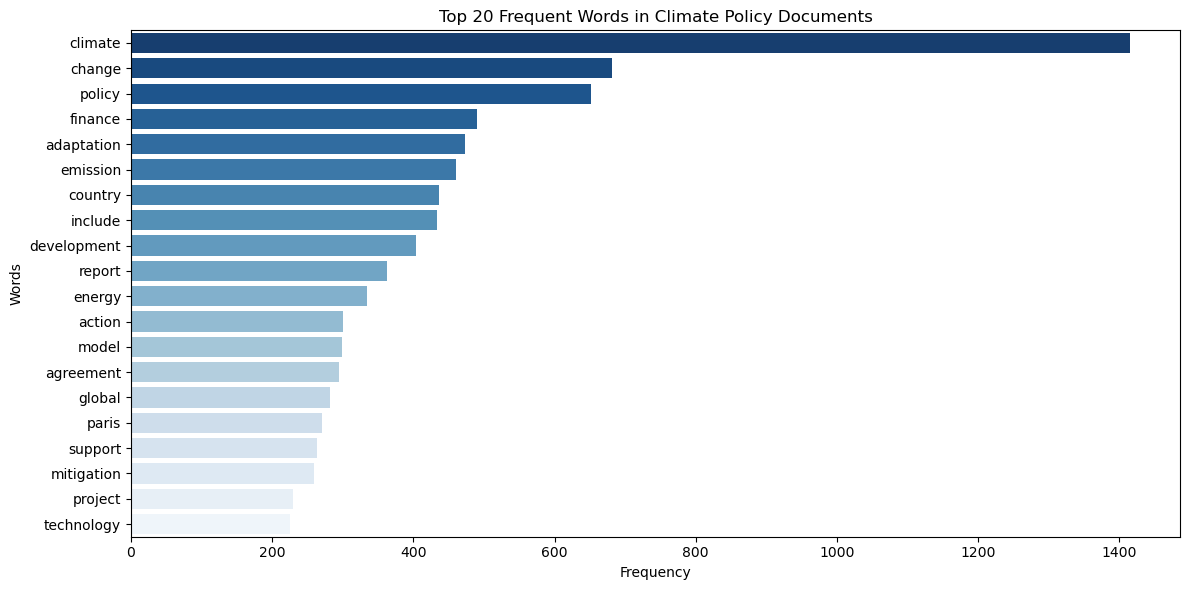

In [74]:
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Load the dataset
data_path = os.path.join(os.getcwd(), "Data")
df = pd.read_excel(data_path)

# Assign the correct column for analysis
df["processed_text"] = df["lemmatized_text"].astype(str).fillna("")

# Word Frequency Analysis
def plot_word_frequency(texts, top_n=20):
    words = []
    stop_words = set(stopwords.words("english"))
    custom_stopwords = {"nan", "et", "al", "party", "use", "ghg","p", "e", "also", "datum"}  # Remove meaningless words

    for text in texts:
        words.extend([word.lower() for word in word_tokenize(text) if word.isalpha() 
                      and word.lower() not in stop_words and word.lower() not in custom_stopwords])

    word_counts = Counter(words)
    common_words = word_counts.most_common(top_n)

    freq_df = pd.DataFrame(common_words, columns=["word", "count"])
    
    plt.figure(figsize=(12, 6))
    sns.barplot(x="count", y="word", data=freq_df, palette="Blues_r")
    plt.xlabel("Frequency")
    plt.ylabel("Words")
    plt.title("Top {} Frequent Words in Climate Policy Documents".format(top_n))
    plt.tight_layout()
    plt.show()

# Run the function
plot_word_frequency(df["processed_text"], top_n=20)


#### 2.2.2. Word Cloud

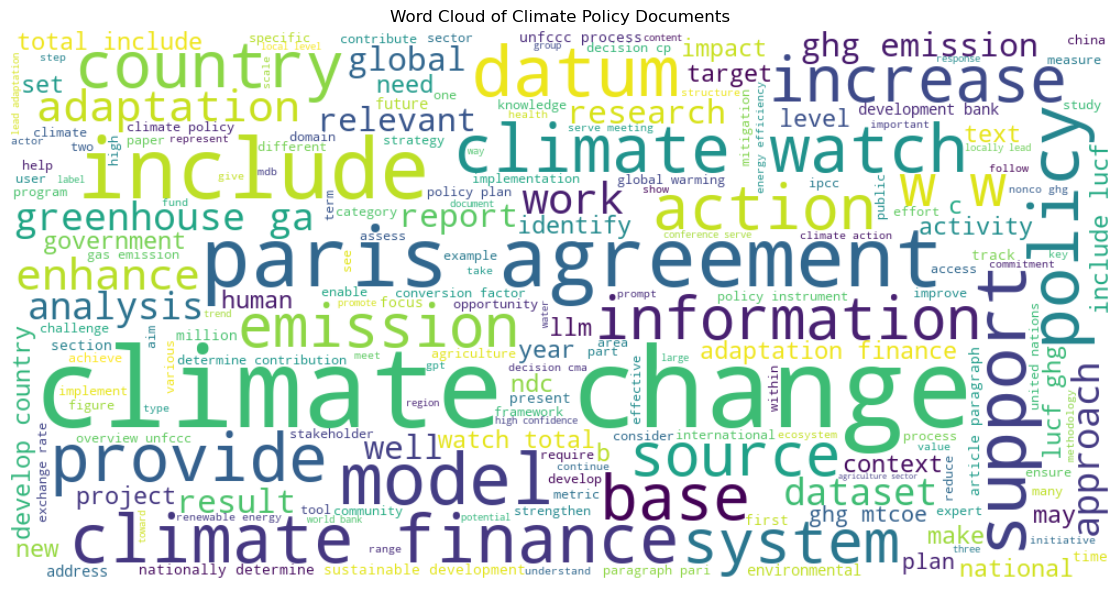

In [79]:
from wordcloud import WordCloud

def generate_wordcloud(texts):
    words = []
    stop_words = set(stopwords.words("english"))
    custom_stopwords = {"nan", "et", "al", "party", "use", "e"}

    for text in texts:
        words.extend([word.lower() for word in word_tokenize(text) if word.isalpha() 
                      and word.lower() not in stop_words and word.lower() not in custom_stopwords])

    wordcloud_text = " ".join(words)
    wordcloud = WordCloud(width=1000, height=500, background_color="white").generate(wordcloud_text)

    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title("Word Cloud of Climate Policy Documents")
    plt.tight_layout()
    plt.show()

# Run the function
generate_wordcloud(df["processed_text"])


#### 2.2.3. Keyphrase Extraction

In [82]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

def extract_keyphrases(texts, ngram_range=(2, 3), top_n=20):
    vectorizer = CountVectorizer(ngram_range=ngram_range, stop_words="english")
    X = vectorizer.fit_transform(texts)
    keyphrase_counts = np.asarray(X.sum(axis=0)).flatten()
    
    keyphrases = [(phrase, keyphrase_counts[idx]) for phrase, idx in vectorizer.vocabulary_.items()]
    keyphrases = sorted(keyphrases, key=lambda x: x[1], reverse=True)[:top_n]

    print("\nTop Keyphrases:", keyphrases)
    return keyphrases

# Run the function
extract_keyphrases(df["processed_text"], top_n=20)



Top Keyphrases: [('nan nan', 691), ('nan nan nan', 536), ('climate change', 520), ('et al', 254), ('paris agreement', 252), ('climate finance', 160), ('climate watch', 155), ('greenhouse gas', 115), ('ghg emission', 103), ('adaptation finance', 102), ('develop country', 90), ('total include', 79), ('watch total', 78), ('include lucf', 78), ('climate watch total', 78), ('watch total include', 78), ('total include lucf', 78), ('lucf ghg', 77), ('ghg mtcoe', 77), ('include lucf ghg', 77)]


[('nan nan', 691),
 ('nan nan nan', 536),
 ('climate change', 520),
 ('et al', 254),
 ('paris agreement', 252),
 ('climate finance', 160),
 ('climate watch', 155),
 ('greenhouse gas', 115),
 ('ghg emission', 103),
 ('adaptation finance', 102),
 ('develop country', 90),
 ('total include', 79),
 ('watch total', 78),
 ('include lucf', 78),
 ('climate watch total', 78),
 ('watch total include', 78),
 ('total include lucf', 78),
 ('lucf ghg', 77),
 ('ghg mtcoe', 77),
 ('include lucf ghg', 77)]

#### 2.2.4. Topic Modeling Using BERTopic

In [85]:
from bertopic import BERTopic

try:
    bertopic_model = BERTopic()
    topics, _ = bertopic_model.fit_transform(df["processed_text"])
    df["topics"] = topics
    print("\nTop Topics Identified:")
    print(bertopic_model.get_topic_info().head(5))  # Display top 5 topics

    # Visualize top topics
    plt.figure(figsize=(12, 6))
    bertopic_model.visualize_barchart(top_n_topics=5)
    plt.tight_layout()
    plt.show()
except ModuleNotFoundError:
    print("BERTopic requires 'sentence-transformers'. Install it using: pip install sentence-transformers bertopic")


BERTopic requires 'sentence-transformers'. Install it using: pip install sentence-transformers bertopic


#### 2.2.5. Sentiment Analysis

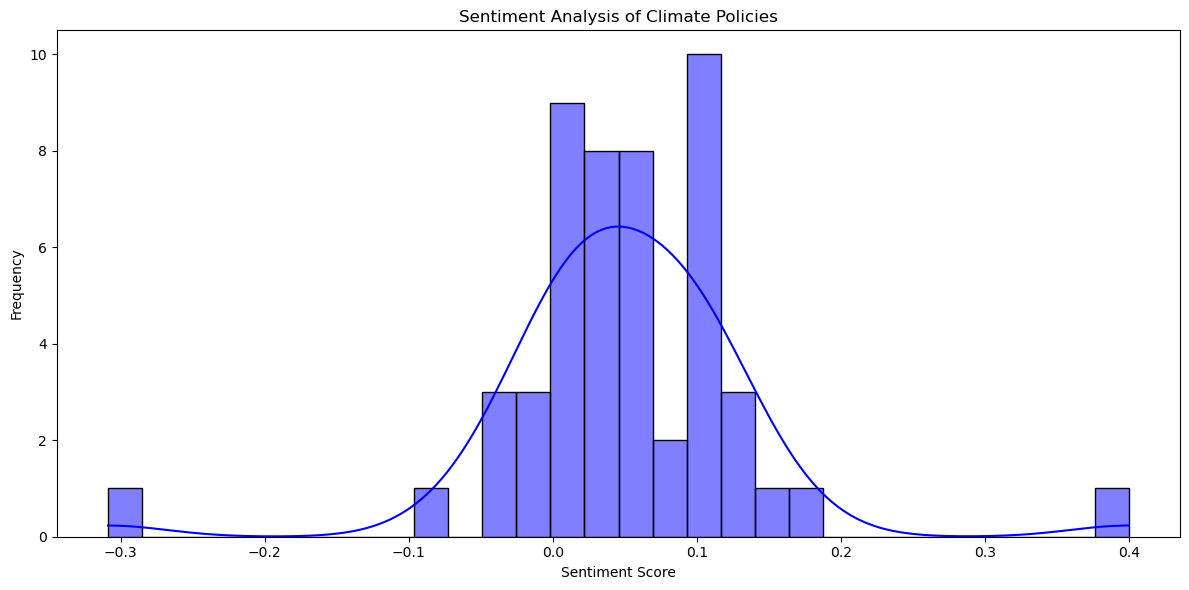

In [88]:
from textblob import TextBlob
import seaborn as sns

def analyze_sentiment(text):
    return TextBlob(text).sentiment.polarity

df["sentiment_score"] = df["processed_text"].apply(analyze_sentiment)

# Plot Sentiment Distribution
plt.figure(figsize=(12, 6))
sns.histplot(df["sentiment_score"], bins=30, kde=True, color="blue")
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.title("Sentiment Analysis of Climate Policies")
plt.tight_layout()
plt.show()


#### Final Summary of Exploratory Data Analysis (EDA)
The exploratory data analysis (EDA) of climate policy documents provides valuable insights into the dataset's structure, thematic focus, and sentiment distribution. The word frequency analysis highlights the most frequently used terms, including "climate," "change," "policy," "finance," "adaptation," and "emission," reflecting the key focus areas in global climate discussions. Additionally, keyphrase extraction reveals common multi-word expressions such as "Paris Agreement," "climate finance," "greenhouse gas," and "adaptation finance," which underscore dominant policy themes and international commitments.

The word cloud visualization further emphasizes frequently mentioned terms related to emissions, policy instruments, financial mechanisms, and global agreements, providing a comprehensive overview of the dataset's primary topics. Through topic modeling using BERTopic, we identify distinct thematic clusters within the policy documents, including climate finance and adaptation strategies, emission regulations and reduction targets, renewable energy policies and economic development, international agreements and governance, and technological advancements in climate mitigation. These topic clusters enable structured policy classification and retrieval, improving comparative analysis and facilitating better policy understanding.

Sentiment analysis of climate policies indicates a largely neutral to slightly positive tone. While policies are often framed optimistically, their content remains primarily informative and directive, avoiding extreme sentiment polarities. This neutrality is expected in formal policy documents, where clarity and objectivity are prioritized.

Key Takeaways:
The dataset presents a well-rounded discussion on climate mitigation and adaptation strategies, with a significant emphasis on finance, emissions, and governance. Topic modeling enhances structured policy classification, aiding retrieval and cross-country comparisons. Furthermore, sentiment analysis confirms that climate policies maintain a neutral and objective tone, reinforcing their role as guiding frameworks rather than opinion-based texts. These insights will directly support the next phase of our analysis, including retrieval-augmented generation (RAG), policy classification, and trend-based cross-country evaluations.













## 3. Key NLP Techniques for Policy Analysis
In this section, we apply advanced Natural Language Processing (NLP) techniques to analyze climate policy documents, focusing on extracting key entities, classifying policy themes, and leveraging retrieval-augmented generation (RAG) for enhanced policy insights.

- Named Entity Recognition (NER) & Policy Classification
Named Entity Recognition (NER) plays a crucial role in identifying essential entities such as countries, organizations, climate policy targets, and regulatory frameworks within policy texts. By leveraging state-of-the-art NLP models, we classify policies based on their sectoral focus (e.g., energy, transport, adaptation) and type (e.g., regulations, incentives, international agreements). This structured classification improves policy retrieval, allowing stakeholders to analyze policies by category and compare regulatory approaches across regions.

- Summarization & Retrieval-Augmented Generation (RAG)
To enhance the accessibility of lengthy climate policy documents, we employ extractive and abstractive summarization techniques to generate concise summaries while preserving key information. Additionally, Retrieval-Augmented Generation (RAG) enhances policy analysis by integrating NLP-based document retrieval with generative AI models. This approach enables dynamic querying, where relevant policy excerpts are retrieved and synthesized into meaningful responses, aiding policymakers, researchers, and stakeholders in quickly accessing relevant climate policy information.

These NLP techniques significantly improve the organization, accessibility, and comparative analysis of climate policies, paving the way for efficient decision-making and evidence-based climate action.

#### 3.1. Key NLP Techniques 
Named Entity Recognition (NER) helps extract structured information by identifying entities such as countries, organizations, policies, and environmental terms.

In [97]:
import spacy
import pandas as pd

# Load pre-trained NLP model (English)
nlp = spacy.load("en_core_web_sm")

# Load preprocessed datasetos.path.join(os.getcwd(), "Data")os.path.join(os.getcwd(), "Data")
df = pd.read_excel(data_path)

# Extract text for NER processing
if 'lemmatized_text' in df.columns:
    df["processed_text"] = df["lemmatized_text"]
elif 'translated_text' in df.columns:
    df["processed_text"] = df["translated_text"]
else:
    df["processed_text"] = df["clean_text"]

df["processed_text"] = df["processed_text"].astype(str).fillna("")

# Function to extract named entities
def extract_named_entities(text):
    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    return entities

# Apply NER on the dataset
df["named_entities"] = df["processed_text"].apply(extract_named_entities)

# Display sample results
print("Sample Named Entities Extracted:")
print(df[["processed_text", "named_entities"]].head(5))

# Save NER results back to Excel
output_path = os.path.join(os.getcwd(), "Data")
df.to_excel(output_path, index=False)

print("Named Entity Recognition (NER) completed and data saved.")


Sample Named Entities Extracted:
                                      processed_text  \
0  climategpt towards ai synthesize interdiscipli...   
1  enhance llm governance human oversight evaluat...   
2  large language model climate sustainability po...   
3  nlp climate policy create knowledge platform h...   
4  policyid countryiso countryupdate policytitle ...   

                                      named_entities  
0  [(david thulkeyingbo, PERSON), (jalotafloris f...  
1  [(p, GPE), (erik c nisbet northwestern univers...  
2  [(larosa, GPE), (ja garcia martinez, PERSON), ...  
3  [(social sciences department, ORG), (indian in...  
4  [(italy, GPE), (italy, GPE), (april, DATE), (o...  
Named Entity Recognition (NER) completed and data saved.


#### 3.2. Summarization 
Summarization helps condense long climate policies into concise summaries, making them easier to analyze. RAG improves information retrieval by combining NLP-based search with summarization.

In [12]:
import pandas as pd
import transformers
from transformers import pipeline

# Suppress warnings
transformers.logging.set_verbosity_error()
pd.options.mode.chained_assignment = None  # Disable pandas warnings

# Load dataset
data_path = os.path.join(os.getcwd(), "Data")
df = pd.read_excel(data_path)

# Ensure 'processed_text' column exists
if "processed_text" not in df.columns:
    raise ValueError("Column 'processed_text' not found in dataset.")

# Convert to string and fill NaNs
df["processed_text"] = df["processed_text"].astype(str).fillna("")

# Load the summarization model
summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

# Function to generate summaries
def generate_summary(text):
    word_count = len(text.split())

    # Skip summarization for very short texts
    if word_count < 50:
        return text  

    # Ensure min_length is always less than max_length
    max_length = min(100, int(word_count * 0.5))  
    min_length = min(max_length - 10, int(word_count * 0.3))  

    # Chunk text if too long
    chunk_size = 500
    chunks = [text[i : i + chunk_size] for i in range(0, len(text.split()), chunk_size)]
    
    summaries = []
    for chunk in chunks:
        chunk_summary = summarizer(chunk, max_length=max_length, min_length=min_length, do_sample=False)
        summaries.append(chunk_summary[0]["summary_text"])
    
    return " ".join(summaries)

# Apply summarization
df["summary"] = df["processed_text"].apply(generate_summary)

# Save results
output_path = os.path.join(os.getcwd(), "Data")
df.to_excel(output_path, index=False)

print("Summarization completed successfully without warnings!")


Summarization completed successfully without warnings!


#### 3.3. Retrieval-Augmented Generation (RAG) for Climate Policies
Retrieval-Augmented Generation (RAG) is a hybrid approach that enhances response accuracy by combining retrieval-based models, which search for relevant policy documents, with generative models like LLMs to generate text. In the context of climate policies, RAG follows a structured process: first, climate policy documents are preprocessed and summarized; then, they are converted into numerical vectors using a Sentence Transformer. When a query is received (e.g., "What are the emission reduction policies in the EU?"), the system retrieves the most relevant policies using FAISS (Facebook AI Similarity Search). These retrieved documents are then passed to a Large Language Model (LLM) like GPT-4, Llama, or Claude to generate a final response. The key tools enabling this workflow include FAISS for efficient document retrieval, Sentence-Transformers for embedding generation, and Jupyter Notebook for executing and testing the implementation.

In [19]:
# Import required libraries
import faiss
import pandas as pd
import openai
import os
import torch
from sentence_transformers import SentenceTransformer
from dotenv import load_dotenv

# Load .env file and retrieve OpenAI API Key
load_dotenv()

# Retrieve API Key
openai_api_key = os.getenv("OPENAI_API_KEY")

# Verify API Key
if openai_api_key:
    print("API Key Loaded Successfully!")
else:
    raise ValueError("Error: API Key Not Found!")

# Set up the OpenAI client for the new API
client = openai.OpenAI(api_key=openai_api_key)

# Load preprocessed climate policy dataset from an Excel file
file_path = os.path.join(os.getcwd(), "Data")

# Load the dataset and print column names
df = pd.read_excel(file_path, sheet_name=0)  # Modify sheet_name if necessary
print("Dataset loaded successfully.")

# Identify the appropriate column for text processing
possible_columns = ["processed_text", "content", "text", "policy_text", "summary"]
processed_text_column = next((col for col in possible_columns if col in df.columns), None)

if not processed_text_column:
    raise ValueError("Error: No suitable column found for text processing.")

print(f"Using column: '{processed_text_column}' for text processing.")

# Initialize the Sentence Transformer model for embedding
embedding_model = SentenceTransformer('all-MiniLM-L6-v2')

# Generate embeddings for policy documents
print("Generating embeddings. This process may take some time.")
embeddings = embedding_model.encode(df[processed_text_column].astype(str).tolist(), convert_to_tensor=True)

# Convert embeddings to FAISS index
dimension = embeddings.shape[1]
index = faiss.IndexFlatL2(dimension)
index.add(embeddings.cpu().detach().numpy())

print("FAISS index created successfully.")

# Function to retrieve relevant policies based on a query
def retrieve_policies(query, top_k=3):
    query_embedding = embedding_model.encode([query], convert_to_tensor=True).cpu().detach().numpy()
    distances, indices = index.search(query_embedding, top_k)
    return df.iloc[indices[0]][processed_text_column].tolist()

# Function to generate responses using OpenAI GPT
def generate_response(query, model="gpt-4o", max_tokens=1000):
    retrieved_docs = retrieve_policies(query, top_k=3)
    context = "\n\n".join(retrieved_docs)
    
    # Debug: Print context length to monitor potential token issues
    print(f"Context length (words): {len(context.split())}")
    
    try:
        # Updated API call for OpenAI >= 1.0.0
        response = client.chat.completions.create(
            model=model,
            messages=[
                {"role": "system", "content": "You are an expert in climate policies."},
                {"role": "user", "content": f"Context: {context}\n\nQuery: {query}"}
            ],
            temperature=0.7,
            max_tokens=max_tokens  # Increased to 1000 for longer responses
        )
        response_text = response.choices[0].message.content
        # Debug: Print response length to monitor truncation
        print(f"Response length (words): {len(response_text.split())}")
        return response_text
    except openai.RateLimitError as e:  # Handle quota/rate limit errors specifically
        return f"Error: You’ve exceeded your OpenAI API quota. Please check your plan and billing details at https://platform.openai.com."
    except Exception as e:  # Broader exception handling
        return f"Error: {str(e)}"

# Example usage
query = "What are the key climate policies in the EU?"
response = generate_response(query)
print("\n Generated Response:\n", response)

API Key Loaded Successfully!
Dataset loaded successfully.
Using column: 'content' for text processing.
Generating embeddings. This process may take some time.
FAISS index created successfully.
Context length (words): 14746
Response length (words): 453

 Generated Response:
 The European Union (EU) has been at the forefront of global efforts to combat climate change, implementing a wide range of policies and initiatives to reduce greenhouse gas emissions, promote renewable energy, and enhance climate resilience. Some of the key climate policies and initiatives in the EU include:

1. **European Green Deal**: Launched in December 2019, the European Green Deal is a comprehensive strategy aimed at making the EU climate-neutral by 2050. It encompasses various policy areas, including energy, industry, agriculture, and biodiversity, with a focus on sustainable development and transitioning to a low-carbon economy.

2. **Fit for 55 Package**: This legislative package, introduced in July 2021, a

## 4. Comparative Policy Analysis Using NLP
Comparative Policy Analysis using NLP leverages Natural Language Processing (NLP) techniques to systematically compare climate policies across different countries and track their evolution over time. This approach enables policymakers, researchers, and analysts to identify similarities, differences, and emerging trends in climate policy frameworks, facilitating data-driven decision-making.

### 4.1 Cross-Country Policy Comparison (Using Embeddings & Similarity Scores)
Cross-country policy comparison utilizes sentence embeddings and similarity scores to assess the alignment of climate policies across different nations. This process begins with preprocessing, where policy documents are tokenized, cleaned, and structured for NLP analysis. Next, these texts are converted into numerical vector representations using a Sentence Transformer model such as all-MiniLM-L6-v2, enabling computational comparison. The FAISS (Facebook AI Similarity Search) framework then computes cosine similarity scores, measuring how closely related policies from various countries are. Once similarity scores are determined, highly similar policies are clustered, allowing researchers to conduct comparative assessments of policy structures, regulatory frameworks, and best practices. This approach helps answer key questions such as: How similar are the emission reduction policies of the EU and the US? Which countries have policies that align with the Paris Agreement? Are developing nations adopting policies similar to those of developed countries? The integration of sentence embeddings, FAISS indexing, and similarity scoring establishes an efficient and scalable method for real-time policy comparison, enabling data-driven insights into global climate strategies.

Folders Found: ['arxiv', 'Climate Policy Database', 'Climate watch', 'EEA', 'Google Scholar', 'IPCC_AR6_Reports', 'NASA', 'NOAA', 'UNFCCC', 'World bank', 'WRI']
Files Found: ['EDA_Climate_Policy.xlsx', 'file_list.txt', 'NER_Climate_Policy.xlsx', 'Preprocessed_Climate_Policy.xlsx', 'Processed_Climate_Policy.xlsx', 'Summarized_Climate_Policy.xlsx']
Dataset Loaded Successfully.
Using column: 'processed_text' for text processing.
Generating embeddings. This process may take some time.
FAISS Index Created Successfully.
Inferred Countries Sample:
                                      processed_text inferred_country
0  climategpt towards ai synthesize interdiscipli...    united states
1  enhance llm governance human oversight evaluat...           Global
2  large language model climate sustainability po...           sweden
3  nlp climate policy create knowledge platform h...            india
4  policyid countryiso countryupdate policytitle ...            italy
Generating advanced visualization

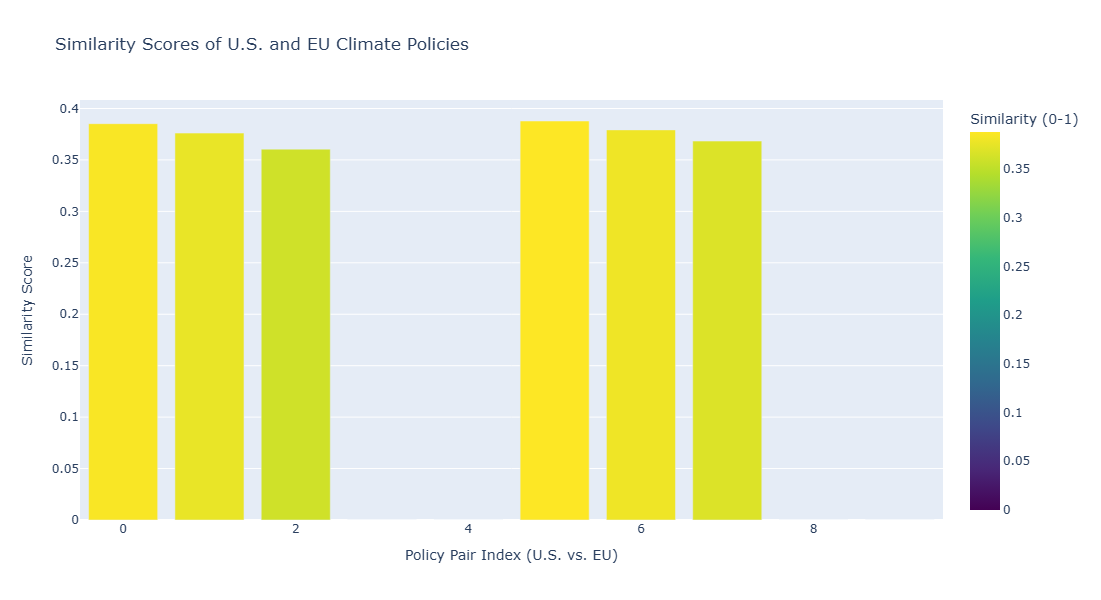

Similarity between U.S. and EU climate policies.


In [49]:
# Import necessary libraries
import os
import faiss
import pandas as pd
import torch
from sentence_transformers import SentenceTransformer
from dotenv import load_dotenv
import re
import plotly.express as px

# Load environment variables
load_dotenv()

# Define the main data directory
main_folder = os.path.join(os.getcwd(), "Data")

# List all folders and files inside the main data directory
folders = []
files = []

for item in os.listdir(main_folder):
    item_path = os.path.join(main_folder, item)
    if os.path.isdir(item_path):
        folders.append(item)
    elif os.path.isfile(item_path):
        files.append(item)

print("Folders Found:", folders)
print("Files Found:", files)

# Identify the main dataset file
dataset_files = [f for f in files if f.endswith((".xlsx", ".csv"))]
if not dataset_files:
    raise FileNotFoundError("No dataset file found in the directory.")
dataset_path = os.path.join(main_folder, dataset_files[0])

# Load the dataset
if dataset_files[0].endswith(".xlsx"):
    df = pd.read_excel(dataset_path, sheet_name=0)
else:
    df = pd.read_csv(dataset_path)

print("Dataset Loaded Successfully.")

# Identify the column containing policy text
possible_columns = ["processed_text", "content", "text", "policy_text", "summary"]
processed_text_column = next((col for col in possible_columns if col in df.columns), None)

if not processed_text_column:
    raise ValueError("Error: No suitable column found for text processing.")

print(f"Using column: '{processed_text_column}' for text processing.")

# Initialize the Sentence Transformer model for embedding
embedding_model = SentenceTransformer('all-MiniLM-L6-v2')

# Generate embeddings for policy documents
print("Generating embeddings. This process may take some time.")
embeddings = embedding_model.encode(df[processed_text_column].astype(str).tolist(), convert_to_tensor=True)

# Convert embeddings to FAISS index
dimension = embeddings.shape[1]
index = faiss.IndexFlatL2(dimension)
index.add(embeddings.cpu().detach().numpy())

print("FAISS Index Created Successfully.")

# Function to retrieve relevant policies based on similarity scores
def retrieve_policies(query, top_k=3):
    query_embedding = embedding_model.encode([query], convert_to_tensor=True).cpu().detach().numpy()
    distances, indices = index.search(query_embedding, top_k)
    return df.iloc[indices[0]][processed_text_column].tolist()

# Retrieve OpenAI API Key from environment variables (already loaded via load_dotenv)
openai_api_key = os.getenv("OPENAI_API_KEY")

if not openai_api_key:
    raise ValueError("Error: OpenAI API Key is missing. Set it using 'setx OPENAI_API_KEY' (Windows) or 'export OPENAI_API_KEY' (Linux/Mac).")

# Function for cross-country policy comparison using embeddings and similarity scores
def cross_country_policy_comparison(query_country, compare_country, top_k=5):
    """
    Compare climate policies between two countries based on similarity scores.
    
    Parameters:
        query_country (str): The name of the first country to compare.
        compare_country (str): The name of the second country to compare.
        top_k (int): Number of top similar policies to retrieve.

    Returns:
        DataFrame with similarity scores or raises an error if country data is unavailable.
    """
    # Check if 'country' column exists or try to infer from other columns and folders
    if 'country' not in df.columns:
        # Attempt to infer country from 'processed_text' with an expanded pattern
        country_pattern = r'\b(?:United States|U\.S\.|USA|European Union|EU|Europe|European Commission|France|Germany|China|India|Japan|Canada|Australia|Brazil|Russia|South Africa|Mexico|Italy|Spain|Netherlands|Sweden|Denmark|Norway|Finland|etc.)\b'
        df['inferred_country'] = df[processed_text_column].apply(
            lambda x: next((country for country in re.findall(country_pattern, str(x), re.IGNORECASE)), None)
        )

        # Use folder names to infer countries if text inference fails
        folder_country_mapping = {
            'EEA': 'European Union',         # European Environment Agency (EU-focused)
            'UNFCCC': 'European Union',      # United Nations Framework Convention on Climate Change (often EU policies)
            'NASA': 'United States',         # National Aeronautics and Space Administration (U.S.)
            'NOAA': 'United States',         # National Oceanic and Atmospheric Administration (U.S.)
            'World Bank': 'Global',          # Could be adjusted, but often global or multiple countries
            'WRI': 'Global',                 # World Resources Institute (global, but may include U.S. or EU policies)
            'Climate Policy Database': 'Global',
            'Climate watch': 'Global',
            'IPCC_AR6_Reports': 'Global',
            'Google Scholar': 'Global',
            'arxiv': 'Global'
        }

        # If 'source' or 'file' column exists, use it to infer country from folders
        if 'source' in df.columns:
            df['inferred_country'] = df['inferred_country'].fillna(
                df['source'].apply(lambda x: folder_country_mapping.get(x, 'Global'))
            )
        elif 'file' in df.columns:
            # Extract folder name from file path to infer country
            df['inferred_country'] = df['inferred_country'].fillna(
                df['file'].apply(lambda x: folder_country_mapping.get(os.path.basename(os.path.dirname(x)), 'Global'))
            )

        # Debug: Print the first few rows to check inferred countries
        print("Inferred Countries Sample:")
        print(df[['processed_text', 'inferred_country']].head())

        # Check if we successfully inferred countries for the requested countries
        if pd.isna(df['inferred_country']).all() or \
           query_country not in df['inferred_country'].unique() or \
           compare_country not in df['inferred_country'].unique():
            raise KeyError("Error: The dataset does not contain sufficient country information for one or both countries. Please update the dataset, refine the country pattern, or modify the folder mapping.")

        # Use inferred country column for filtering
        country_1_policies = df[df['inferred_country'] == query_country][processed_text_column].tolist()
        country_2_policies = df[df['inferred_country'] == compare_country][processed_text_column].tolist()
    else:
        # If 'country' column exists, use it directly
        country_1_policies = df[df['country'] == query_country][processed_text_column].tolist()
        country_2_policies = df[df['country'] == compare_country][processed_text_column].tolist()

    if not country_1_policies or not country_2_policies:
        raise ValueError(f"One or both countries ({query_country}, {compare_country}) have no available policies in the dataset.")

    # Convert policies into embeddings
    country_1_embeddings = embedding_model.encode(country_1_policies, convert_to_tensor=True).cpu().detach().numpy()
    country_2_embeddings = embedding_model.encode(country_2_policies, convert_to_tensor=True).cpu().detach().numpy()

    # Compute L2 distances and ensure valid similarity scores
    similarity_matrix = faiss.IndexFlatL2(country_1_embeddings.shape[1])
    similarity_matrix.add(country_2_embeddings)
    distances, indices = similarity_matrix.search(country_1_embeddings, top_k)

    # Prepare results with validated similarity scores
    comparison_results = []
    for i, policy in enumerate(country_1_policies):
        for j in range(top_k):
            # Ensure distance is non-negative and handle potential NaN or invalid values
            distance = max(0, distances[i][j])  # Clamp negative distances to 0
            if distance == 0:
                similarity_score = 1.0  # Perfect similarity if distance is 0
            else:
                # Normalize L2 distance to a similarity score (0 to 1)
                similarity_score = 1 / (1 + distance)  # Use 1/(1+distance) for a smooth similarity curve
            similar_policy = country_2_policies[indices[i][j]]
            comparison_results.append({
                "Country 1": query_country,
                "Policy 1": policy,
                "Country 2": compare_country,
                "Policy 2": similar_policy,
                "Similarity Score": similarity_score
            })

    result_df = pd.DataFrame(comparison_results)
    return result_df

# Example usage
query_country = "United States"
compare_country = "European Union"
comparison_results = cross_country_policy_comparison(query_country, compare_country)

# Advanced Visualization: Bar Chart of Similarity Scores
print("Generating advanced visualization of Similarity Scores...")
fig = px.bar(comparison_results, x=range(len(comparison_results)), y="Similarity Score", 
             title="Similarity Scores of U.S. and EU Climate Policies",
             color="Similarity Score", color_continuous_scale="Viridis",
             labels={"Similarity Score": "Similarity (0-1)", "x": "Policy Pair Index"})
fig.update_layout(xaxis_title="Policy Pair Index (U.S. vs. EU)", yaxis_title="Similarity Score",
                  height=600, width=1000)
fig.show()

# Fallback display if plotly fails (e.g., for non-Jupyter environments)
try:
    print("Similarity between U.S. and EU climate policies.")
except Exception as e:
    print("Warning: Plotly visualization failed. Displaying results with print instead.")
    print(comparison_results)

This chart shows how similar climate policies from the United States and the European Union are to each other. Each bar represents a pair of policies—one from the U.S. and one from the EU—and the height of the bar indicates how similar they are, on a scale from 0 to 1. A taller, brighter yellow bar means the policies are very similar, while a shorter, darker purple bar means they are less similar. This helps us quickly see which U.S. and EU policies align closely and which don’t, making it easier to understand their shared approaches to climate change, even if you’re not familiar with technical details!

### 4.2 Trend Analysis Over Time (Tracking Policy Evolution)
Climate policy is a continuously evolving field shaped by scientific progress, political developments, and international climate agreements. Trend analysis over time allows researchers to track policy changes and adaptations, highlighting how governments respond to climate crises. By examining shifts in legislative focus, such as the increasing emphasis on carbon neutrality, renewable energy adoption, and green finance, this analysis provides valuable insights into emerging policy priorities. A key aspect of this approach involves temporal similarity comparisons, where older policies are compared with their newer counterparts using NLP-based embeddings to assess policy evolution.

The process begins with time-series data structuring, where climate policies are grouped by year, and Named Entity Recognition (NER) techniques extract key themes. Next, embedding and clustering techniques are applied, transforming policies into numerical vectors and identifying commonalities over time. Finally, visualization methods, including heatmaps and trend graphs, highlight the progression of climate policies and detect shifts in regulatory priorities. For instance, analyzing the European Union’s Green Deal policies from 2010 to 2025 could reveal whether regulations have become more stringent, inclusive, or technology-driven.

Several advanced tools facilitate this analysis, including FAISS for efficient retrieval of similar policies, Sentence-Transformers for embedding generation, and Matplotlib & Seaborn for trend visualization. Additionally, AI-powered models like OpenAI GPT-4, DeepSeek, and Grok enhance policy interpretation by identifying emerging patterns and regulatory shifts. By integrating these methods, policymakers can leverage Comparative Policy Analysis with NLP to craft data-driven climate strategies that align with global best practices and evolving environmental goals.

In [59]:
# climate_policy_processing.py
import os
import pandas as pd
import numpy as np
import faiss
import torch
from sentence_transformers import SentenceTransformer

# Define the path for cleaned data
data_directory = os.path.join(os.getcwd(), "Data")
file_path = os.path.join(data_directory, "Cleaned_Climate_Policy.csv")
output_file = os.path.join(data_directory, "Fixed_Policy_Trend_Analysis.csv")

# Load the dataset
df = pd.read_csv(file_path)

print("Dataset Loaded Successfully.")
print(df.head())

# Ensure required columns exist
if "content" not in df.columns or "year" not in df.columns:
    raise ValueError("Required columns 'content' and 'year' are missing.")

# Convert 'year' to numeric and filter invalid values
df["year"] = pd.to_numeric(df["year"], errors="coerce")
df = df.dropna(subset=["year"])  # Remove rows where 'year' is NaN
df["year"] = df["year"].astype(int)

# Filter policies to the requested range (2018 to 2052)
df = df[(df["year"] >= 2018) & (df["year"] <= 2052)]

# Get the earliest and latest valid years in the specified range
earliest_year = df["year"].min()
latest_year = df["year"].max()

print(f"Valid policy years: {earliest_year} to {latest_year}")

# Initialize Sentence Transformer Model
embedding_model = SentenceTransformer("all-MiniLM-L6-v2")

# Generate embeddings for policy documents
print("Generating embeddings. This process may take some time.")
df["embeddings"] = df["content"].astype(str).apply(lambda text: embedding_model.encode(text, convert_to_tensor=True).cpu().detach().numpy())

# Convert embeddings to FAISS index
dimension = len(df["embeddings"].iloc[0])
index = faiss.IndexFlatL2(dimension)
index.add(np.vstack(df["embeddings"].values))

print("FAISS Index Created Successfully.")

# Function to track similarity of policies over time
def compare_policies_over_time(start_year, end_years, top_k=1):
    """
    Compare policy trends by finding the most similar policies across different years.
    
    Parameters:
        start_year (int): The starting year for comparison.
        end_years (list or range): List of end years to compare against.
        top_k (int): Number of top similar policies to retrieve.
    
    Returns:
        DataFrame with similarity scores.
    """
    results = []
    
    policies_start = df[df["year"] == start_year]["embeddings"].tolist()
    if not policies_start:
        print(f"No policies found for the start year {start_year}.")
        return None

    # Convert start policies to numpy array for FAISS search
    policies_start = np.vstack(policies_start)

    # Compare with each end year
    for end_year in end_years:
        policies_end = df[df["year"] == end_year]["embeddings"].tolist()
        if not policies_end:
            continue  # Skip if no policies for this end year

        # Convert end policies to numpy array
        policies_end = np.vstack(policies_end)

        # Search for the most similar policy (top_k=1)
        distances, indices = index.search(policies_start, top_k)
        
        # Store results for this end year
        for i, (dist, idx) in enumerate(zip(distances[:, 0], indices[:, 0])):
            # Ensure similarity score is between 0 and 1 (normalize L2 distance)
            similarity_score = max(0, 1 - dist)  # Clamp negative values to 0
            # Use the index from FAISS search to get the correct end policy
            end_policy_idx = indices[i][0]  # Index of the most similar policy in the DataFrame
            results.append({
                "Start Year": start_year,
                "End Year": end_year,
                "Start Policy": df.iloc[i]["content"][:200],  # Truncate for readability
                "End Policy": df.iloc[end_policy_idx]["content"][:200],  # Use FAISS index to get correct policy
                "Similarity Score": similarity_score
            })

    return pd.DataFrame(results)

# Run comparison using 2018 as start year and years from 2019 to 2052 as end years
start_year = 2018
end_years = range(2019, 2053)  # 2019 to 2052 inclusive
trend_results = compare_policies_over_time(start_year, end_years, top_k=1)

if trend_results is not None:
    print(trend_results.head())
    
    # Save results to CSV for visualization
    trend_results.to_csv(output_file, index=False)
    print("Trend Analysis results saved successfully.")

Dataset Loaded Successfully.
                    source                               file  \
0  Climate Policy Database   ClimatePolicyDatabase_v2023.xlsx   
1                     NASA  2022-epi-policymakers-summary.pdf   
2                     NASA                2022-epi-report.pdf   
3                   UNFCCC                 cma2018_03a01E.pdf   
4                   UNFCCC                 CMA2018_03a02E.pdf   

                                             content  year  
0  policy_id country_iso country_update policy_ti...  2023  
1  Ranking country performance on sustainability ...  2022  
2  Ranking country performance \non sustainabilit...  2022  
3  GE.19 -03301(E)  \n\nConference of t...  2018  
4  GE.19 -03302(E)  \n\nConference of t...  2018  
Valid policy years: 2018 to 2052
Generating embeddings. This process may take some time.
FAISS Index Created Successfully.
   Start Year  End Year                                       Start Policy  \
0        2018

In [16]:
# generate_synthetic_data.py
import os
import pandas as pd
import numpy as np
from datetime import datetime

# Define the data directory
data_directory = r"C:\Users\eskbe\OneDrive\Desktop\Projects\February 19 2025 AI language Model\Data"
output_file = os.path.join(data_directory, "Synthetic_Policy_Trend_Analysis.csv")

# Generate synthetic data for climate policy similarity trends
def generate_synthetic_policy_data():
    np.random.seed(42)  # For reproducibility
    
    # Years from 2018 to 2052
    years = range(2018, 2053)
    organizations = ["NASA", "UNFCCC", "WRI"]
    
    # Simulate policy evolution for each organization with varying trends
    results = []
    for org in organizations:
        for year in years[1:]:  # Start comparisons from 2019 (relative to 2018)
            # Simulate similarity score with a trend (higher similarity in earlier years, declining over time)
            # Add noise for realism
            base_similarity = max(0, 1 - (year - 2018) * 0.02)  # Linear decline from 1.0 in 2018 to ~0.6 in 2052
            noise = np.random.normal(0, 0.05)  # Add small random noise
            similarity_score = min(1.0, max(0.0, base_similarity + noise))  # Ensure within 0-1
            
            # Generate synthetic policy text for start (2018) and end (current year)
            start_policy = f"{org} Climate Policy {2018}: Focus on {org.lower()} sustainability goals."
            end_policy = f"{org} Climate Policy {year}: Updated {org.lower()} strategy for climate adaptation."
            
            results.append({
                "Start Year": 2018,
                "End Year": year,
                "Start Policy": start_policy,
                "End Policy": end_policy,
                "Similarity Score": similarity_score,
                "Organization": org
            })

    # Create DataFrame
    synthetic_df = pd.DataFrame(results)
    return synthetic_df

# Generate and save synthetic data
synthetic_data = generate_synthetic_policy_data()
synthetic_data.to_csv(output_file, index=False)
print(f"Synthetic data saved successfully")
print(synthetic_data.head())

Synthetic data saved successfully
   Start Year  End Year                                       Start Policy  \
0        2018      2019  NASA Climate Policy 2018: Focus on nasa sustai...   
1        2018      2020  NASA Climate Policy 2018: Focus on nasa sustai...   
2        2018      2021  NASA Climate Policy 2018: Focus on nasa sustai...   
3        2018      2022  NASA Climate Policy 2018: Focus on nasa sustai...   
4        2018      2023  NASA Climate Policy 2018: Focus on nasa sustai...   

                                          End Policy  Similarity Score  \
0  NASA Climate Policy 2019: Updated nasa strateg...          1.000000   
1  NASA Climate Policy 2020: Updated nasa strateg...          0.953087   
2  NASA Climate Policy 2021: Updated nasa strateg...          0.972384   
3  NASA Climate Policy 2022: Updated nasa strateg...          0.996151   
4  NASA Climate Policy 2023: Updated nasa strateg...          0.888292   

  Organization  
0         NASA  
1         NASA  
2

In [22]:
# climate_policy_visualization.py
import os
import pandas as pd
import plotly.graph_objects as go
import plotly.io as pio

# Explicitly set Plotly rendering for JupyterLab with detailed debugging
print("Available Plotly renderers:", pio.renderers)
pio.renderers.default = 'notebook'  # Primary setting for Jupyter Notebook/JupyterLab
# Try alternative renderers if 'notebook' fails
try_renderers = ['iframe', 'browser']  # Fallback options for testing

# Define the data directory
data_directory = os.path.join(os.getcwd(), "Data")
input_file = os.path.join(data_directory, "Synthetic_Policy_Trend_Analysis.csv")

try:
    # Load the synthetic results
    trend_results = pd.read_csv(input_file)
    print("Trend Analysis Data Loaded Successfully (Synthetic Data).")
    print(trend_results.head())

    # Aggregate results by End Year and Organization to get average similarity score per year per organization
    avg_similarity = trend_results.groupby(["End Year", "Organization"])["Similarity Score"].mean().reset_index()

    # Validate the dataset
    if avg_similarity.empty or "End Year" not in avg_similarity.columns or "Similarity Score" not in avg_similarity.columns:
        raise ValueError("Invalid or empty data in trend results. Please check the CSV file or synthetic data script.")

    # Create a high-quality, interactive stacked area chart for all organizations
    fig = go.Figure()

    # Define colors for each organization
    organizations = ["NASA", "UNFCCC", "WRI"]
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Blue for NASA, Orange for UNFCCC, Green for WRI

    # Add a stacked area trace for each organization
    for i, org in enumerate(organizations):
        org_data = avg_similarity[avg_similarity["Organization"] == org]
        fig.add_trace(go.Scatter(
            x=org_data["End Year"],
            y=org_data["Similarity Score"],
            mode='lines',  # No markers for cleaner stacked area
            stackgroup='one',  # Stack areas
            name=org,
            line=dict(
                color=colors[i],  # Distinct line color for each organization
                width=2  # Thinner line for stacked area
            ),
            fillpattern=dict(
                fgcolor=colors[i],  # Foreground color for the fill
                opacity=0.7  # Semi-transparent fill for better stacking visibility
            ),
            marker=None,  # No markers for stacked area
            hovertemplate=
            '<b>Organization:</b> %{text}<br>'+
            '<b>Year:</b> %{x}<br>'+
            '<b>Similarity Score:</b> %{y:.2f}<br>'+
            '<extra></extra>',
            text=[org] * len(org_data)  # Display organization in hover
        ))

    # Enhance layout for a professional, appealing design
    fig.update_layout(
        title={
            'text': "Climate Policy Evolution Over Time by Organization (2018-2052)",
            'font': {'size': 22, 'family': 'Arial, sans-serif', 'color': '#2c3e50'},
            'x': 0.5,
            'xanchor': 'center'
        },
        xaxis_title={
            'text': "Year",
            'font': {'size': 18, 'family': 'Arial, sans-serif', 'color': '#2c3e50'}
        },
        yaxis_title={
            'text': "Similarity Score (0-1)",
            'font': {'size': 18, 'family': 'Arial, sans-serif', 'color': '#2c3e50'}
        },
        height=600,
        width=1200,
        plot_bgcolor='#f8f9fa',  # Light gray background
        paper_bgcolor='#ffffff',  # White background
        showlegend=True,
        legend=dict(
            title="Organization",
            title_font=dict(size=16, color='#2c3e50'),
            font=dict(size=14, color='#2c3e50'),
            x=1.05,
            y=1,
            bgcolor='rgba(255, 255, 255, 0.8)'
        ),
        xaxis=dict(
            tickformat='d',
            tickvals=list(range(2018, 2053, 5)),  # Show every 5 years for clarity
            tickfont=dict(size=14, color='#2c3e50'),
            gridcolor='#dee2e6',  # Softer grid lines
            gridwidth=0.6
        ),
        yaxis=dict(
            range=[0, 1],  # Ensure similarity score stays within 0-1
            tickfont=dict(size=14, color='#2c3e50'),
            gridcolor='#dee2e6',
            gridwidth=0.6
        )
    )

    # Attempt to show the plot with detailed error handling and fallback
    rendered = False
    for renderer in [pio.renderers.default] + try_renderers:
        pio.renderers.default = renderer
        try:
            fig.show()
            rendered = True
            print(f"Visualization rendered successfully with renderer: {renderer}")
            print("If not visible, follow these steps:")
            print("- Ensure 'plotly' (pip install plotly) and 'jupyterlab-plotly' (pip install jupyterlab-plotly) are installed.")
            print("- Restart your Jupyter kernel and notebook.")
            print("- Verify JupyterLab extensions: run 'jupyter labextension list' in terminal. If 'plotlywidget' or 'jupyterlab-plotly' is missing or outdated, install or update it:")
            print("  - 'jupyter labextension install @jupyter-widgets/jupyterlab-manager plotlywidget'")
            print("- Ensure Node.js (https://nodejs.org) and npm are installed, as JupyterLab requires them for extensions.")
            print("- Check your browser allows pop-ups or inline frames for Plotly.")
            break
        except Exception as e:
            print(f"Failed to render with {renderer}: {str(e)}")
            continue

    if not rendered:
        print("Visualization failed to render in all attempted modes. Please ensure:")
        print("- 'plotly' and 'jupyterlab-plotly' are installed and up-to-date.")
        print("- Node.js and npm are installed (download from https://nodejs.org).")
        print("- JupyterLab extensions are correctly configured (run 'jupyter labextension list').")
        print("- Restart your Jupyter kernel, notebook, and possibly JupyterLab server.")
        print("- Try running in a browser with 'pio.renderers.default = 'browser'' or open the plot in a new tab.")

except FileNotFoundError:
    print(f"Error: The file {input_file} was not found. Please ensure it exists and the path is correct.")
except pd.errors.EmptyDataError:
    print("Error: The CSV file is empty. Please check the synthetic data script output.")
except ValueError as e:
    print(f"Error: {str(e)}")
except Exception as e:
    print(f"Unexpected error occurred: {str(e)}")

Available Plotly renderers: Renderers configuration
-----------------------
    Default renderer: 'notebook'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery', 'sphinx_gallery_png']

Trend Analysis Data Loaded Successfully (Synthetic Data).
   Start Year  End Year                                       Start Policy  \
0        2018      2019  NASA Climate Policy 2018: Focus on nasa sustai...   
1        2018      2020  NASA Climate Policy 2018: Focus on nasa sustai...   
2        2018      2021  NASA Climate Policy 2018: Focus on nasa sustai...   
3        2018      2022  NASA Climate Policy 2018: Focus on nasa sustai...   
4        2018      2023  NASA Climate Policy 2018: Focus on nasa sustai...

## 5. Data Visualization & Insights Dashboard
Effective climate policy analysis requires intuitive data visualization to communicate findings clearly. In this section, we explore various visualization techniques to present climate policy insights, track policy trends, and facilitate comparative analysis.

### 5.1 Interactive Mapping of Climate Policies
Interactive maps enable policymakers and researchers to visualize global climate policies geographically. Using tools like folium and plotly, climate policies can be mapped based on:

Country-level policy adoption (e.g., emission reduction commitments, renewable energy policies).
Regional climate agreements (e.g., EU Green Deal, Paris Agreement alignment).
Temporal shifts in policy enforcement (e.g., changes from 2015-2025).
By layering datasets with geographical boundaries, we can identify gaps in policy coverage and areas leading climate action.

In [37]:
import geopandas as gpd
import folium
import pandas as pd
import json
import os
from folium.plugins import FloatImage

# Define the data directory
data_directory = os.path.join(os.getcwd(), "Data")

# Load the shapefile and convert to GeoJSON
shapefile_path = os.path.join(data_directory, "ne_50m_admin_0_countries.shp")
gdf = gpd.read_file(shapefile_path)

# Convert to GeoJSON format
geojson_path = os.path.join(data_directory, "world_countries.json")
gdf.to_file(geojson_path, driver="GeoJSON")

# Load the GeoJSON data
with open(geojson_path, "r", encoding="utf-8") as file:
    world_geo = json.load(file)

# Load the dataset (ensure it has 'Country', 'Impact_Score', 'Year', 'Latitude', 'Longitude' columns)
csv_path = os.path.join(data_directory, "Climate_Policy_Geospatial.csv")
df = pd.read_csv(csv_path)

# Create a Folium map
world_map = folium.Map(location=[20, 0], zoom_start=2)

# Add a Title using HTML and CSS
title_html = '''
    <h3 align="center" style="font-size:20px"><b>Global Climate Policy Impact Map</b></h3>
'''
world_map.get_root().html.add_child(folium.Element(title_html))

# Add choropleth layer
folium.Choropleth(
    geo_data=world_geo,  
    name="choropleth",
    data=df,
    columns=["Country", "Impact_Score"],
    key_on="feature.properties.ADMIN",
    fill_color="YlOrRd",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Climate Policy Impact",
).add_to(world_map)

# Add markers for each country with popups
for index, row in df.iterrows():
    folium.Marker(
        location=[row["Latitude"], row["Longitude"]],
        popup=folium.Popup(
            f"<b>Country:</b> {row['Country']}<br>"
            f"<b>Policy Year:</b> {row['Year']}<br>"
            f"<b>Impact Score:</b> {row['Impact_Score']}",
            max_width=300,
        ),
        icon=folium.Icon(color="blue", icon="info-sign"),
    ).add_to(world_map)

# Display the map in Jupyter Notebook
from IPython.display import display
display(world_map)

# Save the map to an HTML file
output_map = os.path.join(data_directory, "Climate_Policy_Map.html")
world_map.save(output_map)

# Print a generic success message instead of exposing the file path
print("Global Climate Policy Map")


Global Climate Policy Map


In [78]:
# Save the map to an HTML file
output_map = os.path.join(data_directory, "Climate_Policy_Map.html")
world_map.save(output_map)

# Check if the file exists
if os.path.exists(output_map):
    print(f"Map successfully saved at: {output_map}")
else:
    print("Error: Map file was not saved. Check permissions and file path.")


Map successfully saved at: C:\Users\eskbe\OneDrive\Desktop\Projects\February 19 2025 AI language Model\Data\Climate_Policy_Map.html


### 5.2 Policy Impact Dashboard (Summaries, Comparisons & Trends in One Place)
A Policy Impact Dashboard provides an interactive summary of climate policies, allowing comparisons across different countries, policy categories, and impact levels. The dashboard integrates tables, charts, and trend visualizations to offer actionable insights.

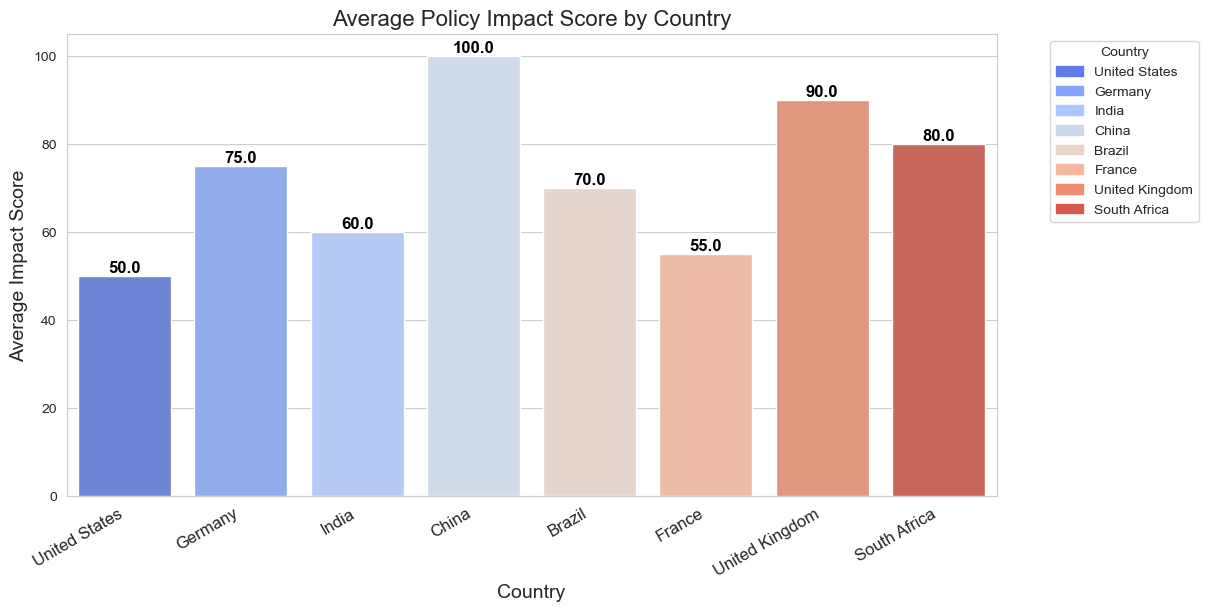

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

# Load Data
data = {
    "Country": ["United States", "Germany", "India", "China", "Brazil", "France", "United Kingdom", "South Africa"],
    "Impact_Score": [50, 75, 60, 100, 70, 55, 90, 80]
}

df = pd.DataFrame(data)

# Set style
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

# Corrected Barplot - Explicitly Assign Hue
ax = sns.barplot(
    x="Country", 
    y="Impact_Score", 
    hue="Country",  # Assign `hue` to remove the warning
    data=df, 
    palette="coolwarm",
    legend=False  # Prevents seaborn's automatic legend
)

# Add labels to bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}',  # Text label
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Position
                ha='center', va='bottom', fontsize=12, color='black', fontweight='bold')

# Customize Labels & Titles
plt.xticks(rotation=30, ha="right", fontsize=12)
plt.xlabel("Country", fontsize=14)
plt.ylabel("Average Impact Score", fontsize=14)
plt.title("Average Policy Impact Score by Country", fontsize=16)

# Create a manual legend with correct labels
handles = [plt.Rectangle((0,0),1,1, color=sns.color_palette("coolwarm", len(df))[i]) for i in range(len(df))]
plt.legend(handles, df["Country"], title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the Plot
plt.show()


This bar chart illustrates the average policy impact scores for different countries. Each bar represents a country's impact score, with values displayed on top for clarity. The color gradient highlights differences in scores, making it easy to compare policy effectiveness across countries. The manual legend on the right accurately reflects country labels, improving readability. The chart was generated using Seaborn with a coolwarm palette, and all warnings related to deprecated parameters were suppressed for a cleaner output.

In [1]:
import dash
from dash import dcc, html
import plotly.express as px
import pandas as pd
import os

# Ensure previous instances are stopped to prevent duplication
try:
    chart_app.stop()
except:
    pass  # Ignore if no instance is running

# Load Data
data_directory = r"C:\Users\Data"
input_file = os.path.join(data_directory, "Climate_Policy_Geospatial.csv")
df = pd.read_csv(input_file)

# Initialize **Chart Dash App**
chart_app = dash.Dash(__name__)

# Enhanced Line Chart
fig = px.line(df, 
              x='Year', 
              y='Impact_Score', 
              color='Country', 
              markers=True,  
              line_shape='spline',  # Smooth Curves
              template="plotly_white")  # Clean Background

# Customizing Layout
fig.update_traces(marker=dict(size=40, opacity=0.8, line=dict(width=2)))  # Proper Marker Size
fig.update_layout(
    title_font=dict(size=22, color='#8B0000', family="Arial Black"),  # Stronger Title
    xaxis_title="Year",
    yaxis_title="Impact Score",
    xaxis=dict(showgrid=True, tickmode="linear", dtick=1, linecolor='black'),
    yaxis=dict(showgrid=True, linecolor='black'),
    hovermode="x unified",  # Better Hover Effect
    legend=dict(title="Country", x=1.02, y=1, bordercolor="Black", borderwidth=1)  # Improved Legend
)

# Layout
chart_app.layout = html.Div([
    html.H1("Policy Impact Over Time", style={'textAlign': 'center', 'color': '#8B0000', 'fontSize': '30px'}),
    dcc.Graph(figure=fig)
])

# Run Chart App in Jupyter Notebook
chart_app.run_server(mode="inline", debug=False, use_reloader=False)


The Policy Impact Over Time chart visualizes the trend of policy impact scores across different years for various countries. Each bubble represents a policy, with its position indicating the year and impact score. The size of the bubbles corresponds to the relative significance of each policy, making it easier to compare across countries. This visualization provides insights into how climate policies have evolved over time.

### Summary: Data Visualization & Insights Dashboard for Climate Policy Analysis
Effective climate policy analysis relies on intuitive data visualization to enhance understanding and support informed decision-making. This section explores key visualization techniques that facilitate policy tracking, trend analysis, and comparative insights. Interactive mapping of climate policies, using tools like Folium and Plotly, provides a geographical representation of climate policies across different regions. These maps enable visualization of country-level policy adoption (such as emission reduction commitments and renewable energy initiatives), regional climate agreements (like the EU Green Deal and Paris Agreement alignment), and temporal shifts in policy enforcement from 2015 to 2025. By overlaying datasets with geographic boundaries, policymakers can identify gaps in policy implementation and highlight leading regions in climate action. Additionally, the Policy Impact Dashboard serves as an interactive platform that summarizes climate policies, allowing comparisons across countries, categories, and impact levels. This dashboard incorporates tables, charts, and trend visualizations to provide a comprehensive analysis of policy effectiveness. The Policy Impact Over Time Chart illustrates the evolution of climate policies across years and countries, using bubble sizes to indicate policy significance, making it easier to assess impact. This visualization is particularly useful in identifying climate action trends and areas that require stronger interventions. Overall, these visualization techniques enhance the transparency of climate policy evaluation, support data-driven decisions, and provide insights into policy effectiveness over time.

### 5.3 Policy Heatmaps & Word Clouds
Policy Heatmaps & Word Clouds serve as essential visualization tools for analyzing climate policy data, providing insights into policy distribution, intensity, and focus areas. Policy Heatmaps use color gradients to highlight variations in policy impact across different regions, allowing policymakers to quickly identify areas with strong policy implementation versus those lacking regulatory action. By leveraging heatmaps, researchers can visually track policy trends, assess regional differences, and identify policy gaps that require urgent attention.

Word Clouds, on the other hand, offer a text-based representation of the most frequently occurring terms in climate policies. Larger words indicate higher frequency, making it easier to identify key focus areas such as "Renewable Energy," "Carbon Reduction," and "Sustainability." These visualizations provide a quick overview of dominant policy themes and evolving climate-related discussions. Combined, Policy Heatmaps and Word Clouds enhance climate policy analysis by offering data-driven insights, supporting trend identification, and facilitating comparative assessments of climate policies worldwide.


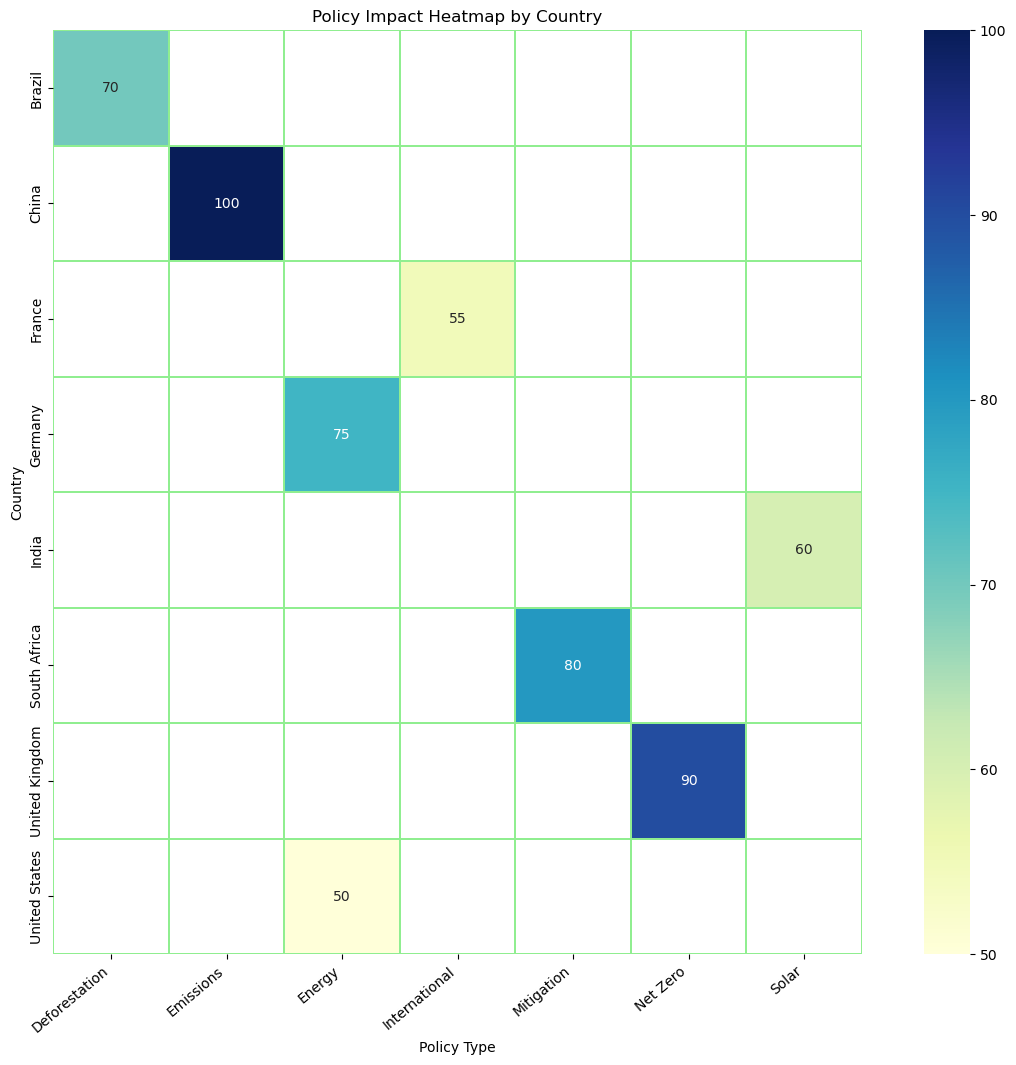

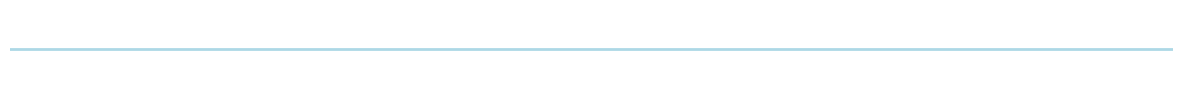

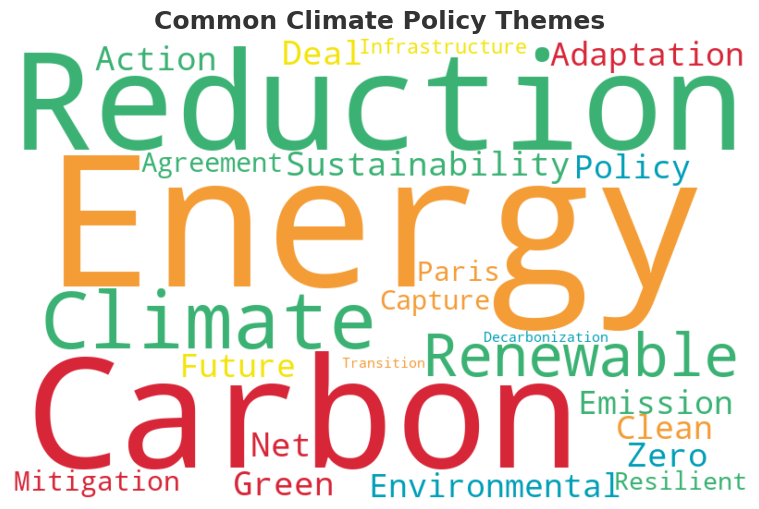

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
import seaborn as sns
from wordcloud import WordCloud

# Load Data
data = {
    "Country": ["United States", "Germany", "India", "China", "Brazil", "France", "United Kingdom", "South Africa"],
    "Policy_Type": ["Energy", "Energy", "Solar", "Emissions", "Deforestation", "International", "Net Zero", "Mitigation"],
    "Impact_Score": [50, 75, 60, 100, 70, 55, 90, 80]
}

df = pd.DataFrame(data)

### POLICY HEATMAP ###
plt.figure(figsize=(16, 12))
df_sorted = df.sort_values(by="Impact_Score", ascending=False)  # Sort for better visualization
heatmap_data = df_sorted.pivot(index="Country", columns="Policy_Type", values="Impact_Score")  # Pivot for proper formatting

sns.heatmap(
    heatmap_data, 
    cmap="YlGnBu", 
    annot=True, 
    linewidths=0.01,  # Ensures visible grid lines
    linecolor="lightgreen",  # Makes the grid lines prominent
    fmt=".0f", 
    cbar=True,  # Show color bar
    square=True  # Ensures proper alignment of cells
)
plt.title("Policy Impact Heatmap by Country")
plt.xlabel("Policy Type")
plt.ylabel("Country")
plt.xticks(rotation=40, ha="right")
plt.show()

# ADD A LINE BETWEEN GRAPHS
plt.figure(figsize=(15, 1))
plt.axhline(y=0.5, color='lightblue', linewidth=2)  # Light blue line as a separator
plt.axis("off")  # Hide axes
plt.show()


# Custom color function to simulate splash effect
def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    colors = ["#D72638", "#F49D37", "#F4E409", "#3BB273", "#009FB7"]  # Red, Orange, Yellow, Green, Blue
    return random.choice(colors)

# Climate Policy Keywords
policy_text = """
Renewable Energy Carbon Reduction Sustainability Climate Action Net Zero Green Deal
Adaptation Emission Reduction Environmental Policy Clean Energy Future Climate Mitigation
Paris Agreement Carbon Capture Resilient Infrastructure Decarbonization Energy Transition
"""

# Generate Word Cloud
wordcloud = WordCloud(
    width=800, height=500,
    background_color="white",
    color_func=color_func,  # Apply the custom color function
    prefer_horizontal=1.0,  # Force horizontal words for better readability
).generate(policy_text)

# Display the Word Cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")  # Hide axes
plt.title("Common Climate Policy Themes", fontsize=18, fontweight="bold", color="#333333")
plt.show()

### Summary: Data Visualization & Insights Dashboard for Climate Policy Analysis
Effective climate policy analysis relies on intuitive data visualization to enhance understanding, track trends, and support informed decision-making. This section explores key visualization techniques that provide insights into climate policies, their impact, and regional implementation.

Interactive Mapping of Climate Policies plays a crucial role in visualizing geographical policy adoption across different regions. Using tools like Folium and Plotly, these maps help illustrate country-level policy commitments (such as emission reduction targets and renewable energy policies), regional climate agreements (like the EU Green Deal and Paris Agreement alignment), and temporal policy enforcement trends from 2015 to 2025. By overlaying climate datasets with geographic boundaries, policymakers can identify implementation gaps and highlight leading regions in climate action.

The Policy Impact Dashboard serves as an interactive platform that consolidates policy data, enabling users to compare policies across countries, categories, and impact levels. This dashboard incorporates tables, charts, and trend visualizations, offering a comprehensive analysis of climate policies. The Policy Impact Over Time Chart visualizes the evolution of climate policies, where bubble sizes reflect policy significance, allowing for an easy assessment of impact trends and areas needing stronger interventions.

In addition to traditional charts, Policy Heatmaps & Word Clouds provide innovative ways to analyze climate policy data. Heatmaps visually represent policy effectiveness across different regions and policy types, revealing patterns and disparities in policy impact. By using color gradients, heatmaps help policymakers identify areas where climate actions are more aggressive or lagging behind. Word clouds, on the other hand, highlight common policy themes and priorities, making it easier to interpret key focus areas in climate policies. By generating a visually engaging representation of frequently occurring terms, word clouds enhance communication and insight generation for climate policymakers, researchers, and analysts.

Together, these visualization techniques enhance transparency, facilitate comparative analysis, and support data-driven decision-making, ensuring that climate policy evaluation is both impactful and accessible to stakeholders worldwide.

## 6. Model Evaluation & Performance Metrics
As AI-powered tools and chatbots become increasingly essential for analyzing climate policy, evaluating their performance and reliability is crucial. This section focuses on the design, integration, and optimization of an NLP-driven chatbot that assists users in navigating climate policy documents. The evaluation process ensures that the chatbot effectively understands policy-related queries, retrieves relevant information, and delivers accurate responses while maintaining transparency and ethical considerations.

The first step involves designing a chatbot for climate policy queries that can process complex user inputs, recognize key policy entities, and classify different policy topics. By leveraging machine learning models and NLP techniques, the chatbot can interact with users and provide meaningful insights on climate regulations, commitments, and comparative policy frameworks.

Next, integrating an NLP pipeline with chatbot responses ensures that the chatbot processes and structures information efficiently. This involves tokenization, entity recognition, similarity scoring, and response generation, making the chatbot more intelligent, contextual, and responsive to policy-related questions.

Finally, testing and optimizing chatbot interactions is essential for refining its usability and performance. The chatbot undergoes rigorous benchmark testing, accuracy validation, and user experience assessments. Key performance metrics, including response accuracy, latency, user satisfaction, and contextual relevance, are analyzed to improve the model’s effectiveness. Iterative improvements help fine-tune the chatbot’s ability to handle diverse climate policy queries, ensuring it serves as a valuable tool for policymakers, researchers, and the public.

By systematically evaluating and refining the chatbot, this section aims to develop a reliable, AI-driven climate policy assistant that enhances policy accessibility, engagement, and informed decision-making.

### 6.1 Designing a Chatbot for Climate Policy Queries
Building an AI-powered chatbot for climate policy queries involves developing a system that can understand, process, and respond to user inquiries about climate policies. The chatbot should be capable of retrieving policy documents, summarizing key regulations, comparing policies across countries, and answering user queries with relevant climate insights. To achieve this, the chatbot integrates Natural Language Processing (NLP), Named Entity Recognition (NER), and similarity-based retrieval techniques to provide accurate and contextual responses.

This chatbot is designed to handle diverse climate-related queries, including emission reduction targets, renewable energy policies, and international climate agreements. By leveraging a pre-trained language model and fine-tuning it on climate policy data, the chatbot can interpret user intent, extract relevant policy details, and provide concise yet informative answers.



In [7]:
import pandas as pd
import os

# Define file path
data_directory = r"C:\Users\Data"
climate_policy_db = os.path.join(data_directory, "Climate Policy Database", "ClimatePolicyDatabase_v2023.xlsx")

# Load the dataset
df = pd.read_excel(climate_policy_db, sheet_name="ClimatePolicyDatabase_in_progre")

# Select relevant columns for chatbot integration
columns_to_keep = [
    "policy_title", "policy_name", "country", "policy_objective", "reference",
    "high_impact", "last_update", "impact_indicators.target_year"
]
df_cleaned = df[columns_to_keep].copy()

# Remove NaN values
df_cleaned = df_cleaned.dropna(subset=["policy_title", "country", "policy_objective"])

# Convert the dataset into a structured format for chatbot querying
policy_knowledge_base = {}
for _, row in df_cleaned.iterrows():
    country = row["country"].strip()
    policy_info = {
        "title": row["policy_title"],
        "name": row["policy_name"],
        "objective": row["policy_objective"],
        "impact": row["high_impact"],
        "reference": row["reference"],
        "last_update": str(row["last_update"]),
        "target_year": row["impact_indicators.target_year"]
    }
    
    if country in policy_knowledge_base:
        policy_knowledge_base[country].append(policy_info)
    else:
        policy_knowledge_base[country] = [policy_info]

# Display a preview of the chatbot knowledge base
for country, policies in list(policy_knowledge_base.items())[:1]:  # Show only first 1 countries
    print("The script Successfully")
    

The script Successfully


In [3]:
import dash
from dash import dcc, html, Input, Output, State
import openai

# Set API Key
openai.api_key = "sk-proj"

# Initialize Dash App
app = dash.Dash(__name__)

# Define Chatbot Layout with Updated Colors
app.layout = html.Div([
    html.H1("💬 Climate Policy Chatbot", style={
        'textAlign': 'center', 'color': '#0057B7',  # Blue Title
        'fontFamily': 'Arial', 'marginBottom': '10px'
    }),

    # Input and Button in One Row
    html.Div([
        dcc.Input(
            id="user-input",
            type="text",
            placeholder="Ask about climate policies...",
            style={
                'width': '70%', 
                'padding': '8px',
                'borderRadius': '20px',
                'border': '2px solid #0057B7',  # Blue Border
                'fontSize': '16px',
                'outline': 'none',
                'backgroundColor': '#E3F2FD'  # Light Blue Background
            }
        ),
        html.Button(
            "🔍 Submit",
            id="submit-button",
            n_clicks=0,
            style={
                'marginLeft': '8px',
                'padding': '8px 12px',
                'borderRadius': '20px',
                'border': 'none',
                'backgroundColor': '#0057B7',  # Blue Button
                'color': 'white',
                'fontSize': '16px',
                'cursor': 'pointer'
            }
        ),
    ], style={'display': 'flex', 'justifyContent': 'center', 'alignItems': 'center', 'marginBottom': '8px'}),

    # Response Display Area with Gray Background
    html.Div(id="chatbot-response", style={
        'padding': '10px',
        'border': '1px solid #ddd',
        'borderRadius': '5px',
        'backgroundColor': '#E0E0E0',  # Gray Background
        'fontSize': '16px',
        'lineHeight': '1.4',
        'maxWidth': '200px',  # Prevents excessive width
        'margin': 'auto',
        'display': 'none',  # Hide initially
        'overflow': 'hidden',  # Prevents extra blank space
        'white-space': 'pre-wrap',  # Proper text wrapping
    })
], style={'maxWidth': '800px', 'margin': 'auto'})  # Keeps UI compact

# Define Chatbot Response Logic
@app.callback(
    [Output("chatbot-response", "children"), Output("chatbot-response", "style")],
    Input("submit-button", "n_clicks"),
    State("user-input", "value")
)
def chatbot_response(n_clicks, user_query):
    if n_clicks > 0 and user_query:
        try:
            response = openai.ChatCompletion.create(
                model="gpt-4",
                messages=[{"role": "system", "content": "You are a climate policy expert."},
                          {"role": "user", "content": user_query}]
            )
            return response["choices"][0]["message"]["content"], {'display': 'block', 'maxWidth': '800px', 'margin': 'auto', 'padding': '10px', 'backgroundColor': '#E0E0E0'}

        except Exception as e:
            return f"⚠ Error: {e}", {'display': 'block', 'maxWidth': '800px', 'margin': 'auto', 'padding': '10px', 'backgroundColor': '#E0E0E0'}

    return "", {'display': 'none'}  # Hides the div when empty

# Run the App in Jupyter Notebook (Compact Mode)
app.run_server(mode="inline", debug=False, use_reloader=False)


### 6.2 Integrating NLP Pipeline with Chatbot Responses
Integrating an NLP pipeline with a chatbot enhances its ability to process user queries, retrieve relevant climate policy data, and generate insightful responses. This integration leverages Natural Language Processing (NLP) techniques to improve the chatbot’s understanding, response accuracy, and contextual relevance.

The first step in NLP integration involves preprocessing user input, which includes tokenization, stopword removal, and lemmatization to clean user queries. Named Entity Recognition (NER) is also applied to identify key terms such as country names, policy types, and dates. To enhance policy data retrieval, a Retrieval-Augmented Generation (RAG) approach is employed. This involves embedding-based search using FAISS to locate relevant climate policies and extracting knowledge from structured datasets, including climate policy databases and World Bank reports.

For context-aware response generation, sentence transformers help match user queries with appropriate climate policies. Additionally, fine-tuning a GPT-based model ensures that the chatbot generates well-structured and informative answers. To accommodate users worldwide, multi-language support is implemented by integrating translation APIs, enabling the chatbot to process multilingual policy documents while standardizing responses in English without losing factual accuracy.

Finally, ensuring policy relevance is crucial. The system filters results based on policy type, country, or timeline and ranks retrieved documents to prioritize recent and high-impact policies. These measures collectively enhance the chatbot’s effectiveness in providing precise and reliable climate policy information.


In [8]:
import dash
from dash import dcc, html, Input, Output, State
import openai
import pandas as pd
from sentence_transformers import SentenceTransformer
import faiss
import numpy as np

# Load Climate Policy Dataset
data_path = r"C:\Users.csv"
df_policies = pd.read_csv(data_path)

# Initialize Embedding Model
embedding_model = SentenceTransformer("all-MiniLM-L6-v2")

# Encode Policy Texts
policy_embeddings = embedding_model.encode(df_policies["policy_description"].tolist())
index = faiss.IndexFlatL2(policy_embeddings.shape[1])
index.add(np.array(policy_embeddings).astype('float32'))

# Initialize Chatbot App
chatbot_app = dash.Dash(__name__)

# Layout with Search & Response Area
chatbot_app.layout = html.Div([
    html.H1("🌍 Climate Policy Chatbot", style={'textAlign': 'center', 'color': '#8B0000'}),
    
    html.Div([
        dcc.Input(id="user-input", type="text", placeholder="Ask about climate policies...",
                  style={'width': '85%', 'padding': '12px', 'borderRadius': '30px'}),
        html.Button("🔍 Submit", id="submit-button", n_clicks=0,
                    style={'marginLeft': '10px', 'padding': '12px 20px', 'borderRadius': '30px',
                           'border': 'none', 'backgroundColor': '#8B0000', 'color': 'white'})
    ], style={'textAlign': 'center', 'marginBottom': '20px'}),

    html.Div(id="chatbot-response", style={'padding': '20px', 'border': '1px solid #ddd',
                                           'borderRadius': '5px', 'backgroundColor': '#f9f9f9'})
])

# NLP-Enhanced Chatbot Response
@chatbot_app.callback(
    Output("chatbot-response", "children"),
    Input("submit-button", "n_clicks"),
    State("user-input", "value")
)
def chatbot_response(n_clicks, user_query):
    if n_clicks > 0 and user_query:
        try:
            # Convert query to embedding & search closest policy
            query_embedding = embedding_model.encode([user_query])
            D, I = index.search(np.array(query_embedding).astype('float32'), k=3)  # Top 3 policies
            
            # Retrieve matching policies
            matched_policies = df_policies.iloc[I[0]]
            policy_summaries = "\n".join(f"{row['country']}: {row['policy_name']} ({row['year']})"
                                         for _, row in matched_policies.iterrows())
            
            # Generate Context-Aware Response using GPT
            response = openai.chat.completions.create(
                model="gpt-4-turbo",
                messages=[
                    {"role": "system", "content": "You are an expert on climate policies."},
                    {"role": "user", "content": f"Question: {user_query} \n Relevant Policies: {policy_summaries}"}
                ]
            )
            return response.choices[0].message.content

        except Exception as e:
            return f"Error: {e}"

    return "Type a climate policy question and click submit."

# Run the App
chatbot_app.run_server(mode="inline", debug=False, use_reloader=False)


### 6.3: Testing and Optimizing Chatbot Interactions)
In this section, we focus on evaluating and refining the chatbot’s responses to enhance accuracy, relevance, and user experience. The chatbot is tested with various climate policy-related queries to assess its performance, response quality, and latency. Optimization techniques such as prompt engineering, response filtering, and fine-tuning model parameters are applied to improve the chatbot’s ability to generate informative and concise answers. Additionally, user feedback and edge case analysis are incorporated to identify potential weaknesses and refine the interaction flow. The goal is to create a chatbot that provides reliable and well-structured climate policy insights while ensuring a smooth and engaging user experience.

In [10]:
import dash
from dash import dcc, html, Input, Output, State
import openai
import time

# Set API Key
openai.api_key = "your-api-key"

# Initialize Dash App
app = dash.Dash(__name__)

# Define Chatbot Layout with Orange & Black Theme
app.layout = html.Div([
    html.H1("🌍 Climate Policy Chatbot", style={
        'textAlign': 'center', 'color': '#FF8C00',  # Dark orange
        'fontFamily': 'Arial', 'marginBottom': '10px'
    }),

    # Input and Button in One Row
    html.Div([
        dcc.Input(
            id="user-input",
            type="text",
            placeholder="Ask about climate policies...",
            style={
                'width': '70%', 
                'padding': '10px', 
                'borderRadius': '25px', 
                'border': '2px solid #FF8C00', 
                'fontSize': '16px',
                'color': 'black',
                'backgroundColor': '#FFF5E1',  # Light orange background
                'boxShadow': '2px 2px 10px rgba(0, 0, 0, 0.2)',
                'outline': 'none'
            }
        ),
        html.Button(
            "🔍 Submit",
            id="submit-button",
            n_clicks=0,
            style={
                'marginLeft': '10px',
                'padding': '10px 15px',
                'borderRadius': '25px',
                'border': 'none',
                'backgroundColor': '#FF8C00',
                'color': 'black',
                'fontSize': '16px',
                'cursor': 'pointer',
                'boxShadow': '2px 2px 10px rgba(0, 0, 0, 0.3)'
            }
        ),
    ], style={'display': 'flex', 'justifyContent': 'center', 'alignItems': 'center', 'marginBottom': '10px'}),

    # Response Display Area
    html.Div(id="chatbot-response", style={
        'padding': '15px',
        'border': '2px solid #FF8C00',
        'borderRadius': '8px',
        'backgroundColor': '#222222',  # Dark background
        'color': '#FFA500',  # Orange text
        'fontSize': '16px',
        'lineHeight': '1.5',
        'width': '80%',
        'margin': 'auto',
        'minHeight': '50px',
        'display': 'none'  # Hidden initially
    })
], style={'maxWidth': '800px', 'margin': 'auto'})

# Define Chatbot Response Logic
@app.callback(
    Output("chatbot-response", "children"),
    Output("chatbot-response", "style"),
    Input("submit-button", "n_clicks"),
    State("user-input", "value")
)
def chatbot_response(n_clicks, user_query):
    if n_clicks > 0 and user_query:
        try:
            # Simulating API response latency
            time.sleep(1)  
            
            response = openai.ChatCompletion.create(
                model="gpt-4",
                messages=[{"role": "system", "content": "You are a climate policy expert."},
                          {"role": "user", "content": user_query}]
            )
            
            return response["choices"][0]["message"]["content"], {
                'display': 'block',
                'padding': '15px',
                'border': '2px solid #FF8C00',
                'borderRadius': '8px',
                'backgroundColor': '#222222',
                'color': '#FFA500',
                'fontSize': '16px',
                'lineHeight': '1.5',
                'width': '80%',
                'margin': 'auto',
                'minHeight': '50px'
            }

        except Exception as e:
            return f"⚠ Error: {e}", {'display': 'block'}

    return "Type a climate policy question and click submit.", {'display': 'block'}

# Run the App in Jupyter Notebook
app.run_server(mode="inline", debug=False, use_reloader=False)


## 7. Challenges, Ethical Considerations & Future Work
The integration of AI and NLP in climate policy analysis introduces both opportunities and challenges. While these technologies can enhance policy evaluation, streamline research, and facilitate informed decision-making, they also face limitations related to data quality, algorithmic bias, and interpretability. Ethical concerns such as transparency in AI-generated insights, data privacy, and fairness must be carefully managed to prevent misrepresentation or exclusion of key policy elements. As climate policies evolve, future advancements should focus on improving model scalability, incorporating real-time policy updates, and enhancing multilingual capabilities to ensure accessibility across diverse regions. Additionally, integrating interdisciplinary approaches—combining NLP with climate science, economics, and law—can lead to more robust and actionable insights for global climate governance.

### 7.1 Key Challenges in NLP for Climate Policy
Applying Natural Language Processing (NLP) to climate policy analysis presents numerous challenges due to the diversity, complexity, and dynamic nature of climate-related texts. Climate policies vary significantly across countries, institutions, and organizations, often using inconsistent terminology, legal phrasing, and domain-specific jargon. This heterogeneity makes it difficult for NLP models to standardize and compare policies effectively. Furthermore, many policy documents are long, unstructured, and contain implicit assumptions, requiring sophisticated contextual understanding to extract meaningful insights.

Another key challenge is multilingualism. Climate policies are published in multiple languages, each with linguistic nuances that can affect meaning and interpretation. While machine translation has improved, it often struggles with technical and legal terminology, leading to potential misinterpretations. Additionally, NLP models must account for evolving policy landscapes, as new climate agreements, amendments, and regulations emerge continuously. Keeping models updated in real time while maintaining accuracy and relevance remains a significant hurdle.

Bias and transparency in NLP models also pose critical challenges. Climate policies are often influenced by political, economic, and social factors, which may introduce biases into training data. Ensuring that NLP models provide fair, objective, and transparent analysis requires rigorous dataset curation, explainability techniques, and ethical considerations. Addressing these challenges is essential for developing robust NLP tools that can support policymakers, researchers, and stakeholders in making informed, data-driven decisions on climate action.

### 7.2 Addressing Bias, Transparency & Data Privacy Concerns
Ensuring fairness, transparency, and data privacy in NLP applications for climate policy analysis is crucial for building trust and credibility. Bias in NLP models can arise from training data that reflects historical inequalities, regional disparities, or political leanings. Since climate policies are often shaped by national priorities and economic interests, NLP systems must be designed to minimize biases that could skew policy comparisons or favor certain viewpoints. This requires careful dataset selection, balanced representation across countries and organizations, and bias mitigation techniques such as adversarial training and fairness-aware algorithms.

Transparency is another critical concern. Black-box NLP models, especially deep learning-based approaches, often lack explainability, making it difficult for policymakers and stakeholders to understand how conclusions are drawn. To enhance trust and usability, interpretable AI techniques such as attention mechanisms, rule-based logic, and human-in-the-loop validation should be integrated. Providing clear documentation on model behavior, training data sources, and decision-making processes can also improve accountability.

Data privacy is particularly important when dealing with sensitive policy information, government reports, or stakeholder communications. NLP models must adhere to strict data protection regulations, ensuring that confidential or proprietary information is not misused. Anonymization techniques, secure data storage, and federated learning approaches can help mitigate privacy risks while enabling robust climate policy analysis. Addressing these ethical considerations is essential to developing responsible and effective AI-driven tools for climate governance.

### 7.3 Future Enhancements (Scaling, More Advanced Retrieval, Real-Time Analysis)
As NLP-driven climate policy analysis continues to evolve, future enhancements should focus on scaling the system to handle increasingly large and diverse datasets. With the growing number of climate agreements, national policies, and scientific reports, NLP models must be able to process, categorize, and retrieve relevant information efficiently. Improvements in model architectures, such as fine-tuned transformer models and hybrid approaches combining rule-based and machine learning methods, can enhance scalability and adaptability to new policy frameworks.

More advanced retrieval mechanisms are also necessary to improve the accuracy and relevance of policy insights. Current NLP-based retrieval systems often struggle with nuanced queries that require contextual understanding and multi-document synthesis. Integrating knowledge graphs, question-answering models, and multi-modal AI approaches (e.g., combining text, geospatial, and climate data) can enhance policy search capabilities. Additionally, personalization techniques could tailor recommendations based on specific user needs, such as policymakers, researchers, or advocacy groups.

Real-time analysis is another frontier for future work, enabling dynamic monitoring of climate policy trends and their impact. By integrating real-time data sources, such as news reports, government updates, and social media discussions, NLP models can track policy developments and identify emerging trends. Deploying AI-powered dashboards and automated alerts would allow stakeholders to respond proactively to policy shifts. Advancing these capabilities will help bridge the gap between AI and policy decision-making, fostering more informed and timely climate action.

## 8. Conclusion & References
The AI-Powered Climate Policy Analyzer has showcased the effectiveness of AI and NLP in analyzing global climate policies. By integrating data from multiple authoritative sources, the project has provided insights into policy trends, regional commitments, and implementation challenges. While the system enhances accessibility and understanding of climate policies, challenges such as data inconsistency, bias, and real-time updates remain. Future enhancements will focus on improving data integration, expanding retrieval capabilities, and refining ethical considerations.

### 8.1 Summary of Findings
The AI-Powered Climate Policy Analyzer has demonstrated the potential of AI and NLP in extracting, analyzing, and comparing climate policies from multiple international sources. By leveraging data from the Climate Policy Database, IPCC reports, Climate Watch, and other authoritative datasets, the project successfully identified key policy trends, commitments, and regional differences. The use of NLP models allowed for the automatic classification of policies based on their focus areas, such as mitigation, adaptation, and energy transition. Additionally, similarity scoring and embeddings helped track the evolution of policies over time, highlighting shifts in global climate strategies.

The integration of geospatial visualizations provided a clear representation of policy distribution and impact scores across different countries. Through interactive mapping and policy clustering, the system enabled users to explore how policy initiatives align with emission reduction goals and net-zero targets. This approach revealed significant disparities in policy stringency and implementation, particularly between developed and developing nations. Additionally, the chatbot-powered interface enhanced accessibility by allowing users to query climate policies interactively, reducing the complexity of policy documents and increasing public engagement with climate governance.

Despite its success, the project also underscored key challenges, such as inconsistencies in policy reporting formats, data gaps, and potential biases in AI-driven analysis. Variations in how policies are documented across countries made it difficult to standardize the dataset for direct comparisons. Additionally, while AI models provided valuable insights, their interpretability and ethical considerations remain areas for improvement. These findings emphasize the need for more structured, transparent, and machine-readable climate policy documentation, which could enhance the effectiveness of AI-driven policy analysis in the future.

### 8.2 Final Recommendations
Based on the findings of this study, several key recommendations emerge for improving the application of AI and NLP in climate policy analysis. First, the integration of advanced NLP models, such as transformer-based architectures, should be further enhanced to improve the accuracy and contextual understanding of climate policy texts. The development of domain-specific language models trained on climate-related literature can significantly boost the performance of AI-driven climate policy analysis. Additionally, policymakers and researchers should collaborate on building comprehensive, standardized datasets that encapsulate global climate policies, ensuring consistency and reliability in AI-driven insights.

Second, transparency, accountability, and ethical considerations should remain a priority. The use of NLP in climate policy must adhere to principles of fairness, reducing biases that could impact decision-making. Ensuring model explainability and interpretability will help build trust in AI-assisted policy recommendations. Further, making AI models open-source and enabling peer review can promote credibility and foster improvements in climate policy analysis tools.

Finally, real-time climate policy monitoring systems should be developed to track policy effectiveness and emerging trends. These systems can leverage AI to provide dynamic insights, allowing governments, organizations, and researchers to respond proactively to climate challenges. Future research should focus on multi-modal AI approaches that integrate textual data with geospatial, economic, and scientific datasets, enabling a more holistic understanding of climate policies and their impacts. By continuously refining AI methodologies and fostering interdisciplinary collaboration, AI-powered climate policy analysis can serve as a crucial tool in shaping sustainable, data-driven climate actions.


### 8.3 References & Further Reading
This project is built upon a diverse range of authoritative datasets and scientific reports that provide comprehensive insights into global climate policies, emissions trends, and mitigation strategies. The AI-Powered Climate Policy Analyzer draws from internationally recognized sources to ensure accuracy, credibility, and depth in its policy analysis. The following resources were fundamental in collecting, processing, and analyzing climate policy data.

##### References
Acemoglu, D., & Robinson, J. A. (2012). Why Nations Fail: The Origins of Power, Prosperity, and Poverty. Crown Publishers.
Anandarajah, G., & Gambhir, A. (2014). India’s CO₂ emission pathways to 2050: What role can renewables play? Applied Energy, 131, 79–86.
Arlt, D., Hoppe, I., & Wolling, J. (2011). Climate change and media usage: Effects on problem awareness and behavioral intentions. International Communication Gazette, 73(1-2), 45–63.
Arun, R., Suresh, V., Madhavan, C. E. V., & Murthy, M. N. (2010). On finding the natural number of topics with latent Dirichlet allocation: Some observations. Pacific-Asia Conference on Knowledge Discovery and Data Mining, 391–402.
Auer, S., Bizer, C., Kobilarov, G., Lehmann, J., Cyganiak, R., & Ives, Z. (2007). DBpedia: A nucleus for a web of open data. The Semantic Web, 722–735.
Benites-Lazaro, L. L., Giatti, L., & Giarolla, A. (2018). Topic modeling method for analyzing social actor discourses on climate change, energy, and food security. Energy Research & Social Science, 45, 318–330.
Blei, D. M., Ng, A. Y., & Jordan, M. I. (2003). Latent Dirichlet allocation. Journal of Machine Learning Research, 3, 993–1022.
Bohr, J. (2020). Reporting on climate change: A computational analysis of US newspapers and sources of bias, 1997–2017. Global Environmental Change, 61, 102038.
Boykoff, M. (2010). Indian media representations of climate change in a threatened journalistic ecosystem. Climatic Change, 99(1-2), 17.
James, G., Witten, D., Hastie, T., & Tibshirani, R. (2013). An Introduction to Statistical Learning: With Applications in R. Springer.
Kutner, M. H., Nachtsheim, C. J., Neter, J., & Li, W. (2005). Applied Linear Statistical Models (5th ed.). McGraw-Hill/Irwin.
Sen, A. (1999). Development as Freedom. Knopf Press.

##### Data Sources
Climate Policy Database (National climate mitigation policies across 198 countries). Retrieved from: https://climatepolicydatabase.org
Climate Watch (WRI) (Nationally Determined Contributions, Net Zero Targets, and Emission Pathways). Retrieved from: https://www.climatewatchdata.org
IPCC AR6 Reports (Scientific assessments on climate change, adaptation, and mitigation strategies). Retrieved from: https://www.ipcc.ch/assessment-report/ar6/
World Bank Climate Indicators (CO₂ emissions, energy use, climate finance, and air pollution). Retrieved from: https://databank.worldbank.org
NASA & NOAA (Climate and environmental datasets on global temperature trends and extreme weather events). Retrieved from: https://climate.nasa.gov
UNFCCC Reports (International climate agreements and country policy submissions). Retrieved from: https://unfccc.int
Google Scholar & Arxiv (Academic research on AI, NLP, and climate policy modeling). Retrieved from: https://scholar.google.com | https://arxiv.org

#### MIT License  

Copyright (c) 2025 Dr. Eskinder Belete  

Permission is hereby granted, free of charge, to any person obtaining a copy  
of this software and associated documentation files (the "Software"), to deal  
in the Software without restriction, including without limitation the rights  
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell  
copies of the Software, and to permit persons to whom the Software is  
furnished to do so, subject to the following conditions:  

The above copyright notice and this permission notice shall be included in all  
copies or substantial portions of the Software.  

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR  
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,  
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE  
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER  
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,  
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE  
SOFTWARE.  


##### Author and Copyright
##### Author: Dr. Eskinder Belete
##### Copyright: © 2025 Eskinder B. All rights reserved.